# 1. Business Problem Description.

Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

# 2. Datasets Description.

In the folder `zippedData` are movie datasets from:

* [Box Office Mojo](https://www.boxofficemojo.com/)
* [IMDB](https://www.imdb.com/)
* [Rotten Tomatoes](https://www.rottentomatoes.com/)
* [TheMovieDB](https://www.themoviedb.org/)
* [The Numbers](https://www.the-numbers.com/)

In addition, I used the following datasets from Kaggle in `.extraData`:

* [Oscar Awards](https://www.kaggle.com/datasets/unanimad/the-oscar-award)
* [Golden Globe Awards](https://www.kaggle.com/datasets/unanimad/golden-globe-awards)
* [TMDB Dataset](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata)
* [IMDB Movies with Content Ratings](https://www.kaggle.com/datasets/shailx/imdb-movie-rating-dataset)

# 2.1. To run this notebook, you will need to download the additional datasets and put then in `extraData` directory.


# 3. Proposed Analysis Steps:

1. Outline general analysis approach.
2. Load all available data from multiple sources into pandas dataframes. Review data frames using `describe()` method.
3. Identify dataframes and columns we'll use for different analysis types. Review the proposed analysis approach in context of the data availability. For each dataframe perform cleaning for the variables of interest. Create a combined dataframe containing relevant variables. 
4. Perform EDA.
5. Narrow down choices and perform additional analysis on subsets.
6. Present the findings in form of the table.

# 3. 1. General Analysis Approach.

Our main analysis will focus on how movie profits are distibuted by genres and how variables like content rating,release date, or having criticaly acclaimed cast/crew affect the distribution.

## 3.2. Data Loading.

Importing most of the modules we'll be using for basic data loading and cleaning. We'll import additional modules later as needed.

In [1]:
import pandas as pd
import numpy as np

# sql modules
from pandasql import sqldf
import sqlite3 

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# file system modules 
import os
import zipfile

#### Defining supplimental function handling `.zip` files.
Function will list contents of `dir_input` (input parameter) and extract any zipped files to `unzipped` sub-directory. Directory `unzipped` is going to be created, if it doesn't exist. If the files already extracted, function will print them out  and return path `path_dir_dest` to `unzipped` directory.

We're going to use the function for extracting all `*.zip` files.

In [2]:
# lists directory contents and unzippes files into subdirectory.
# returns path to unzipped files. 
def list_and_extract_files(dir_input):
    # list directory contents
    dir_files = [f for f in os.listdir(dir_input) if not f.startswith('.')]
    
    # print the contents
    print('All files: \n', dir_files)
    
    # directory to extract the contents
    dir_unzip = './unzipped'
    
    # creating filesystem path to input dir and dir_unzip
    path_dir_source = os.path.join(dir_input)
    path_dir_dest = os.path.join(dir_input, 'unzipped')
    
    # if dir_unzip doesn't exist, create it. If it exists, do nothing.
    os.makedirs(path_dir_dest, exist_ok=True)
    # list contents of dir_unzip
    contents_of_unzip_dir = os.listdir(path_dir_dest)

    # find out all zipped files and print the names
    files_zip = [f for f in os.listdir(path_dir_source) if f.endswith('.zip')]
    print('Zipped files: \n', files_zip)

    # for all zipped files, check if there's a matching unzipped name in dir_unzip 
    for f in files_zip:
        # get filename before zip
        base_name, extension = os.path.splitext(f)
        # unzip files if they're missing from the dir_unzip
        if (base_name not in contents_of_unzip_dir):
            # extract file using zipfile
            with zipfile.ZipFile(os.path.join(path_dir_source, f), 'r') as zip_ref:
                # extract all contents to the specified directory
                zip_ref.extractall(path_dir_dest)
                # print extracted files  
                print('zipped data ', f, ' extracted successfully into', path_dir_dest)
    return path_dir_dest

#### Using supplimental function to extract the imdb dataset.

In [3]:
# extracting base files
directory_base = './zippedData'
dir_extracted_base = list_and_extract_files(directory_base)

All files: 
 ['unzipped', 'tmdb.movies.csv.gz', 'im.db.zip', 'rt.reviews.tsv.gz', 'rt.movie_info.tsv.gz', 'tn.movie_budgets.csv.gz', 'bom.movie_gross.csv.gz']
Zipped files: 
 ['im.db.zip']


#### Defining results directory.

In [4]:
#define direcory for storing results.
directory_results = 'results'    
path_dir_results = os.path.join(directory_results)

#### Loading TMDB (provided) dataset.

In [5]:
# load csv and tsv files into dataframes: tmdb
tmdb_df = pd.read_csv(os.path.join(directory_base, 'tmdb.movies.csv.gz'), index_col=0)
tmdb_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


#### Loading Rotten Tomatoes reviews and movie info datasets.

For these we'll need to specify encoding and the separator (tab). 
We can load `.gz` files without extracting with `pd.read_csv()`.

In [6]:
# rotten tomatoes reviews and info
rt_reviews_df = pd.read_csv(os.path.join(directory_base, 'rt.reviews.tsv.gz'), \
                            encoding='latin-1', sep='\t', index_col=0)
rt_reviews_df.head()

,review,rating,fresh,critic,top_critic,publisher,date
id,,,,,,,
3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [7]:
rt_reviews_df.describe(include='all')

,review,rating,fresh,critic,top_critic,publisher,date
count,48869,40915,54432,51710,54432.000000,54123,54432
unique,48682,186,2,3496,NaN,1281,5963
top,Parental Content Review,3/5,fresh,Emanuel Levy,NaN,eFilmCritic.com,"January 1, 2000"
freq,24,4327,33035,595,NaN,673,4303
mean,NaN,NaN,NaN,NaN,0.240594,NaN,NaN
std,NaN,NaN,NaN,NaN,0.427448,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,0.000000,NaN,NaN


In [8]:
# rotten tomatoes movie info
rt_movie_info_df = pd.read_csv(os.path.join(directory_base, 'rt.movie_info.tsv.gz'), sep='\t', index_col=0)
rt_movie_info_df.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [9]:
rt_movie_info_df.describe(include = 'all')

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
count,1498,1557,1552,1361,1111,1201,1201,340,340,1530,494
unique,1497,6,299,1125,1069,1025,717,1,336,142,200
top,A group of air crash survivors are stranded in...,R,Drama,Steven Spielberg,Woody Allen,"Jan 1, 1987","Jun 1, 2004",$,"32,000,000",90 minutes,Universal Pictures
freq,2,521,151,10,4,8,11,340,2,72,35


#### Loading movie budgets and movie box office datasets.

In [10]:
# movie budgets
movie_budgets_df = pd.read_csv(os.path.join(directory_base, 'tn.movie_budgets.csv.gz'),index_col=0)
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [11]:
movie_budgets_df.describe(include = 'all')

,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782,5782,5782,5782,5782
unique,2418,5698,509,5164,5356
top,"Dec 31, 2014",Home,"$20,000,000",$0,$0
freq,24,3,231,548,367


In [12]:
# movie box office
movie_box_df = pd.read_csv(os.path.join(directory_base, 'bom.movie_gross.csv.gz'))
movie_box_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


### 3.2.1 Loading IMDB dataset.

This is an SQL database and we'll be using SQL JOIN queries to extract information about movies, cast, and crew.

In [13]:
#path to imdb database
imdb_file = os.path.join(dir_extracted_base, 'im.db')

#### IMDB Database Structure

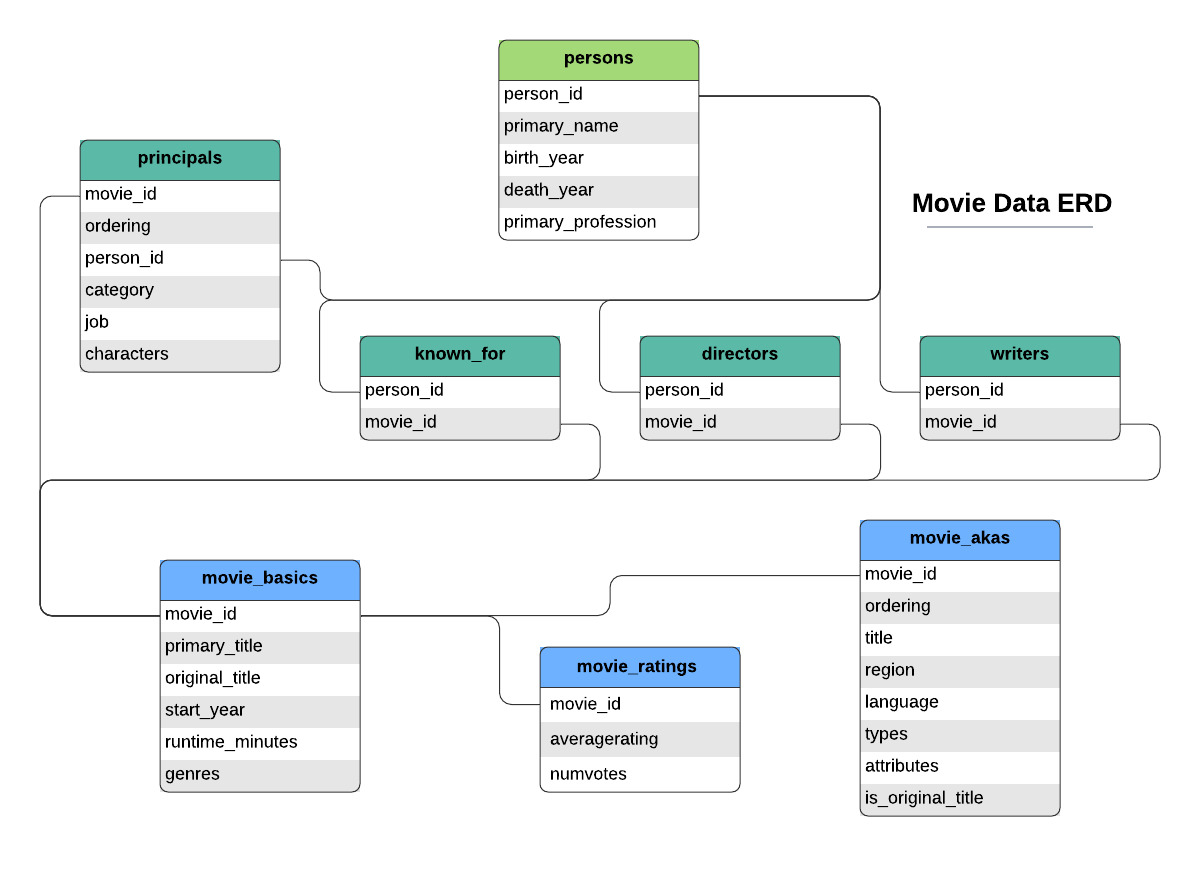

#### Importing `sqlite3` and loading `movie_basics` table.

`movie_basics` table has `movie_id` as primary key, `primary_title` as movie title, release year, runtime, and genres.  

In [14]:
import sqlite3

# connect to the SQLite database
conn = sqlite3.connect(imdb_file)
cur = conn.cursor()

In [15]:
# load movie basics
movie_basics = pd.DataFrame(
    data=cur.execute("""SELECT * FROM movie_basics;""").fetchall(),
    columns=[x[0] for x in cur.description]
)
print(movie_basics.shape)
movie_basics.head()

(146144, 6)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


#### Load `movie_ratings` next.

In [16]:
# load movie ratings
movie_ratings = pd.DataFrame(
    data=cur.execute("""SELECT * FROM movie_ratings;""").fetchall(),
    columns=[x[0] for x in cur.description]
)
print(movie_ratings.shape)
movie_ratings.head()

(73856, 3)


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


#### Load `persons` table.

This table has `person_id` as primary key and `primary_name` as name, but doesn't have a job category or `movie_id`. 

In [17]:
# load persons table 
persons = pd.DataFrame(
    data=cur.execute("""SELECT * FROM persons;""").fetchall(),
    columns=[x[0] for x in cur.description]
)
persons.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


#### Load `principals` table.
This table has `person_id` that we can use to retrieve the name, and `movie_id` that will allow us to add cast/crew with categories to `movie_basics` table later.

In [18]:
# load principlas table 
principals = pd.DataFrame(
    data=cur.execute("""SELECT * FROM principals;""").fetchall(),
    columns=[x[0] for x in cur.description]
)
principals.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


### Merging `movie_basics` table with `principals`, `persons`, `movie_ratings`.

We'll be using primary kerys `movie_id` and `person_id`to create a join movie table where for every movie we'll add a column of cast/crew names from `persons`, and job category from `principals`.
Note that JOIN (`persons`, `principals`) as well as (`movie_basics`, `movie_ratings`) is one-to-one, but JOIN between `principals` and `movie_basics` is one-to-many (and vice versa).

In [19]:
# Define the SQL query
# joining movie_basics table with movie_ratings, principals, persons tables on columns movie_id and person_id
sql_query = """
    SELECT mb.movie_id, mb.primary_title, mb.original_title, mb.start_year, mb.runtime_minutes, mb.genres,
           p.primary_name, pr.category, mr.averagerating, mr.numvotes
    FROM movie_basics mb
    JOIN principals pr ON mb.movie_id = pr.movie_id
    JOIN persons p ON pr.person_id = p.person_id
    JOIN movie_ratings mr ON mb.movie_id = mr.movie_id
"""

# execute the SQL query and fetch the results into a DataFrame
movie_data = pd.read_sql_query(sql_query, conn)
# close the connection, we've loaded all relevant SQL data.
conn.close()

#### Resulting `movie_data` table will have a row for every person because we're doing one-to-many join type. 

It means that a single movie can have multiple cast/crew members, so each row of `movie_basics` will be replicated for every `person_id` that was affiliated with the movie. We'll transform and cleanup later.

In [20]:
# display resulting table
movie_data.head(20)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,primary_name,category,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Naushad,composer,7.0,77
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Abrar Alvi,writer,7.0,77
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Gulzar,writer,7.0,77
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Dilip Kumar,actor,7.0,77
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Sanjeev Kumar,actor,7.0,77
5,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Harnam Singh Rawail,director,7.0,77
6,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Balraj Sahni,actor,7.0,77
7,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Vyjayanthimala,actress,7.0,77
8,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Mahasweta Devi,writer,7.0,77
9,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Anjana Rawail,writer,7.0,77


### Loading additional datasets.

Before we start cleaning up the big table, we're going to load additional datasets.
As a reminder, please make sure the required files are downloaded and placed in `extraData` directory.
We'll use a supplemental function `list_and_extract_files` that was described above.

In [21]:
#extra files
directory_extra = './extraData'
dir_extracted_extra = list_and_extract_files(directory_extra)

All files: 
 ['unzipped', 'movie_metadata_with_R.csv.zip', 'golden_globe_awards.zip', 'tmdb_5000.zip', 'the_oscar_award.csv.zip']
Zipped files: 
 ['movie_metadata_with_R.csv.zip', 'golden_globe_awards.zip', 'tmdb_5000.zip', 'the_oscar_award.csv.zip']
zipped data  golden_globe_awards.zip  extracted successfully into ./extraData/unzipped
zipped data  tmdb_5000.zip  extracted successfully into ./extraData/unzipped


#### Loading awards datasets.

We're going to load the awards datasets.

In [22]:
# loading Oscars
oscars_df = pd.read_csv(os.path.join(dir_extracted_extra, 'golden_globe_awards.csv'), index_col=0)
oscars_df.head()

,year_award,ceremony,category,nominee,film,win
year_film,,,,,,
1943,1944,1,Best Performance by an Actress in a Supporting...,Katina Paxinou,For Whom The Bell Tolls,True
1943,1944,1,Best Performance by an Actor in a Supporting R...,Akim Tamiroff,For Whom The Bell Tolls,True
1943,1944,1,Best Director - Motion Picture,Henry King,The Song Of Bernadette,True
1943,1944,1,Picture,The Song Of Bernadette,NaN,True
1943,1944,1,Actress In A Leading Role,Jennifer Jones,The Song Of Bernadette,True


In [23]:
golden_globes_df = pd.read_csv(os.path.join(dir_extracted_extra, 'the_oscar_award.csv'), index_col=0)
golden_globes_df.head()

,year_ceremony,ceremony,category,name,film,winner
year_film,,,,,,
1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


### Loading  TMDB dataset(s).
#### Loading `tmdb_5000_movies.csv`.

First, load `tmdb_5000_movies. It's a large file and we'll use the `low_memory=False` flag to avoid memory warning.

In [24]:
movies_meta_df = pd.read_csv(os.path.join(dir_extracted_extra, 'tmdb_5000_movies.csv'), \
                             low_memory=False)
movies_meta_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


#### Loading `tmdb_5000_credits.csv`.
Simiar to IMDB dataset, the supplemental table has `movie_id` as a primary key, and cast and crew names listed in what looks like a string of dictionaries. 

In [25]:
movie_credits_df = pd.read_csv(os.path.join(dir_extracted_extra, 'tmdb_5000_credits.csv'), \
                               low_memory=False)
movie_credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


#### Merge dataframes `tmdb_5000_credits` with `tmdb_5000_movies`.
Before we do that, rename `movie_id` to `id ` and check the type of `id` because it looks like a number.
If it is a number, we'll convert it to string and merge two TMDB dataframes on it.

In [26]:
# rename column to match the movies_meta_df table
movie_credits_df.rename(columns={'movie_id':'id'}, inplace=True)
# column types are series
print(type(movie_credits_df['id']))
print(type(movies_meta_df['id']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


#### Merging TMDB dataframes on `id`.

In [27]:
#convert id to string.
movies_meta_df['id'] = movies_meta_df['id'].astype(str)
movie_credits_df['id'] = movie_credits_df['id'].astype(str)

tmdb_movies_rated_df = pd.merge(movies_meta_df, movie_credits_df, on='id', how='inner')

#### Last part of data loading: loading movie content rating dataset `movie_metadata_with_R`.

This dataset looks similat to TMDB dataset containig movie budgety, movie genre, movie gross, year, social media info. 

In [28]:
movie_content_rating_df = pd.read_csv(os.path.join(dir_extracted_extra, \
                                                   'movie_metadata_with_R.csv'), index_col=0)
movie_content_rating_df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
color,,,,,,,,,,,,,,,,,,,,,
Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## 3.3. Merging Data Frames.

#### Let's recap what we have done so far.
From `zippedData` (provided) we loaded the following datasets:
* `tmdb_df` looks like a subset of `IMDB` except it doesn't have any categorical genres (rather genre ids) and no budget or gross or movie title.
* `rt_reviews_df` and `rt_movie_info_df` contain box office, genre, content rating, crew info but no cast or budget.
* `movie_box_df` has movie name and box office but has no budget.
* `movie_budgets_df` has both movie budget and box office.
* `imdb` dataset  has cast, crew, duration, release year, categorical genres but no budget or box office.

From `extraData` (additional) we loaded the following datasets:
* `oscars_df`, `golden_globes_df` containing names of nominated cast/crew and some kind of categorical awarded (yes/no) column.
* `tmdb_movies_rated_df` contains cast, crew, budget, title, release.
* `movie_content_rating_df` contains budget info, genre info and content rating.

#### Deciding on datasets use.

Our goal is to obtain a dataset containg the following movie info: genre, release month and year, runtime, cast, crew, budget, box office, content rating.

* We'll be dropping `tmdb_df`, `rt_reviews_df`, `rt_movie_info_df`, `movie_box_df`. Main reason for all 3 is that they don't have any primary key or even movie title and it will be extremely difficult to merge any of these with other sets.
* We'll move forward with `movie_budgets_df` and `imdb`.
* We'll use `tmdb_movies_rated_df`, `oscars_df`, `golden_globes_df`.
* We'll use `movie_content_rating_df` as it is in separate analysis because it comes without movie title.


#### Next steps.

We're going to clean up and filter datasets from `zippedData` and `extraData` in parallel.
For `IMDB`, we'll format cast/crew columns, remove duplicates, remove NaNs and add budget/gross info and release month from `movie_budgets_df`.

For `tmdb_movies_rated_df`, we'll also format cast/crew columns, remove duplicates, remove NaNs and add award data from `oscars_df`, `golden_globes_df`.
We'll use `movie_content_rating_df` as it is in separate analysis because it comes without movie title. Cleaning and reshaping is going to be inline with the rest of the datasets.

#### Column naming convention.

For all columns we'll be using same naming convention throughout the datasets, i.e. budget column will be named `budget` for all dataframes containing it.

In [29]:
# cleaning unused datasets to release memory
del tmdb_df
del rt_reviews_df
del rt_movie_info_df
del movie_box_df

### 3.3.1. Cleaning  IMDB Dataframe. 
We'll remove extra long movies.
We then filter out movies before year 2000 and drop NaNs.

In [30]:
# max runtime value is 51420.000000, we need to cap movie duration at a reasonable length (say 4 hours)
max_runtime_min = 240;
movie_data = movie_data[(movie_data['start_year']>=2000) & (movie_data['runtime_minutes']<max_runtime_min)]
movie_data_clean = movie_data.dropna().copy()
movie_data_clean.shape
movie_data.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,primary_name,category,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Naushad,composer,7.0,77
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Abrar Alvi,writer,7.0,77
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Gulzar,writer,7.0,77
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Dilip Kumar,actor,7.0,77
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Sanjeev Kumar,actor,7.0,77


### Cleaning up cast/crew data.
#### Splitting cast and crew from the movie.
Remember that for each cast or crew, the corresponding movie row was copied.
We're going to split the dataframe into 4: `actors_df` (cast),  `producers_df`, `writers_df`, `directors_df`.

In [31]:
# filter the dfs for each cast/crew category
cols_of_interest = ['movie_id', 'primary_name', 'category']
movie_data_slice = movie_data_clean[cols_of_interest]
actors_df = movie_data_slice[movie_data_slice['category'].isin(['actor', 'actress'])]
producers_df = movie_data_slice[movie_data_slice['category'] == 'producer']
writers_df = movie_data_slice[movie_data_slice['category'] == 'writer']
directors_df = movie_data_slice[movie_data_slice['category'] == 'director']

#### Aggregating cast and crew.
We'll aggregate cast and crew names for each movie into a single string using `groupby` and `apply` methods.
Method `reset_index(name='cast_or_crew')` will create a new column describing cast/crew. 

In [32]:
# aggregate cast/crew members for each movie and concat names into one string
actors_aggregated = \
actors_df.groupby('movie_id')['primary_name'].apply(lambda x: ', '.join(x)).reset_index(name='cast_names')

producers_aggregated = \
producers_df.groupby('movie_id')['primary_name'].apply(lambda x: ', '.join(x)).reset_index(name='producers')

writers_aggregated = \
writers_df.groupby('movie_id')['primary_name'].apply(lambda x: ', '.join(x)).reset_index(name='writers')

directors_aggregated = \
directors_df.groupby('movie_id')['primary_name'].apply(lambda x: ', '.join(x)).reset_index(name='directors')
directors_df.head()

,movie_id,primary_name,category
5,tt0063540,Harnam Singh Rawail,director
10,tt0066787,Mani Kaul,director
17,tt0069049,Orson Welles,director
42,tt0100275,Raoul Ruiz,director
43,tt0100275,Valeria Sarmiento,director


#### Merging cast/cew info back with the movies on `movie_id`.
Here we're merging back cast/crew into the `movie_data_clean` and dropping duplicates.
This resulting dataframe will have NaNs in cast/crew columns, if cast/crew was missing, but not in other columns. We'll keep it that way and deal with missing values when processing cast/crew data.

In [33]:
# merge the aggregated DataFrames with the original DataFrame
merged_df = pd.merge(movie_data_clean, actors_aggregated, on='movie_id', how='left')
merged_df = pd.merge(merged_df, producers_aggregated, on='movie_id', how='left')
merged_df = pd.merge(merged_df, writers_aggregated, on='movie_id', how='left')
merged_df = pd.merge(merged_df, directors_aggregated, on='movie_id', how='left')
merged_df_no_duplicates = merged_df.drop_duplicates(subset=['movie_id'])
merged_df_no_duplicates.shape

(65573, 14)

#### Saving a subset of the dataframe with relevant columns and renaming columns.

In [34]:
# create a subset with relevant columns
cols_of_interest = ['movie_id', 'primary_title', 'start_year', 'averagerating', \
                    'numvotes', 'runtime_minutes', 'genres',
                   'cast_names','producers', 'writers', 'directors']
imdb_df = merged_df_no_duplicates[cols_of_interest].copy()
imdb_df.rename(columns={'primary_title': 'title', 'start_year':'year', \
                           'averagerating':'avg_rating', 'numvotes':'total_votes', 
                          'runtime_minutes':'duration_min'}, \
                  inplace=True)

# release memory
del merged_df_no_duplicates
del merged_df
del movie_data_clean
del movie_data

imdb_df.describe()

,year,avg_rating,total_votes,duration_min
count,65573.000000,65573.000000,6.557300e+04,65573.000000
mean,2014.258506,6.319125,3.961614e+03,93.399631
std,2.600042,1.458392,3.212259e+04,22.361049
min,2010.000000,1.000000,5.000000e+00,3.000000
25%,2012.000000,5.500000,1.600000e+01,81.000000
50%,2014.000000,6.500000,6.200000e+01,91.000000
75%,2016.000000,7.300000,3.530000e+02,104.000000
max,2019.000000,10.000000,1.841066e+06,239.000000


#### `imdb.df` genre splitting.

In [35]:
# See what we're dealing with.
(imdb_df.genres).value_counts

<bound method IndexOpsMixin.value_counts of 0                 Action,Crime,Drama
10                   Biography,Drama
17                             Drama
27              Comedy,Drama,Fantasy
37        Adventure,Animation,Comedy
                     ...            
563635                         Drama
563645                   Documentary
563647                   Documentary
563657                  Drama,Family
563666                   Documentary
Name: genres, Length: 65573, dtype: object>

Additional big cleanup/adjustment for the `IMDB` is genre splitting. We're going to split the `genres` column into 2 columns: `genre1` and `genre2`. 
We'll use `str.split` on `,` for the genres string, keeping first two columns.
If there's only one genre, we'll duplicate it into the second column: `Drama` in `genres` will be `genre1:Drama` and `genre2:Drama`.

We then check the vote histogram distribution for the genres and filter out genres with lesser amount of votes. 

In [36]:
# split the genres column by comma and expand it into two separate columns
genre_split = imdb_df['genres'].str.split(',', expand=True)

# assign the first two columns of the genre_split DataFrame to new columns in df
imdb_df['genre1'] = genre_split[0]
imdb_df['genre2'] = genre_split[1]

# replace 'None' values in genre2 column with corresponding values from genre1 column
imdb_df['genre2'].fillna(imdb_df['genre1'], inplace=True)

# drop the original genres column
imdb_df.drop(columns=['genres'], inplace=True)

### Histogram of votes by genre and genre count.
We'll plot vote distribution (converting it to millions first) and histogram of genres to see if we can establish the most popular ones.
Looking at the histograms, there's no clear agreement between genre count and popular (by vote) genres.

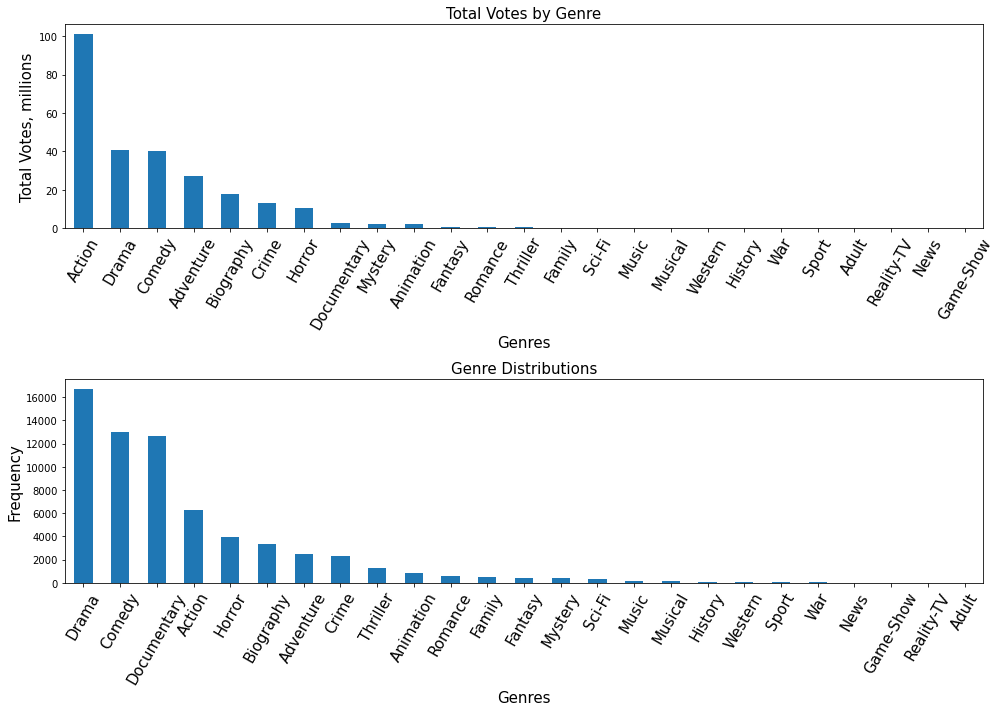

In [37]:
# next step: plot vote distribution.

# Extract genre1 and votes from imdb_clean
df1 = imdb_df[['genre1', 'total_votes']].rename(columns={'genre1': 'genre'})

# Concatenate horizontally
df1['total_votes'] = df1['total_votes']/1e+06

# Group by genre and sum up votes
grouped_df = df1.groupby('genre')['total_votes'].sum()
sorted_df = grouped_df.sort_values(ascending= False)
fig, axes = plt.subplots(2, 1, figsize=(14, 10)) 
sorted_df.plot(kind='bar', ax=axes[0])

axes[0].set_xlabel('Genres', fontsize=15)
axes[0].set_ylabel('Total Votes, millions', fontsize=15)
axes[0].set_title('Total Votes by Genre', fontsize=15)
axes[0].tick_params(axis='x', rotation=60, labelsize=15) 
plt.tight_layout()

#genre distribution
genre_counts = df1['genre'].value_counts()

genre_counts.plot(kind='bar', ax=axes[1])
axes[1].set_xlabel('Genres', fontsize=15)
axes[1].set_ylabel('Frequency', fontsize=15)
axes[1].set_title('Genre Distributions', fontsize=15)
axes[1].tick_params(axis='x', rotation=60, labelsize=15)

plt.tight_layout()

#### Additional genre cleanup.
We'll rename all `Science Fiction` to  `Sci-Fi` genre category.

In [38]:
# unify the `Sci-Fi genre`
imdb_df['genre1'] = imdb_df['genre1'].str.replace('Science Fiction', 'Sci-Fi')
imdb_df['genre2'] = imdb_df['genre2'].str.replace('Science Fiction', 'Sci-Fi')

imdb_df.head()

,movie_id,title,year,avg_rating,total_votes,duration_min,cast_names,producers,writers,directors,genre1,genre2
0,tt0063540,Sunghursh,2013,7.0,77,175.0,"Dilip Kumar, Sanjeev Kumar, Balraj Sahni, Vyja...",NaN,"Abrar Alvi, Gulzar, Mahasweta Devi, Anjana Rawail",Harnam Singh Rawail,Action,Crime
10,tt0066787,One Day Before the Rainy Season,2019,7.2,43,114.0,"Aruna Irani, Arun Khopkar, Rekha Sabnis, Om Sh...",NaN,NaN,Mani Kaul,Biography,Drama
17,tt0069049,The Other Side of the Wind,2018,6.9,4517,122.0,"Peter Bogdanovich, John Huston, Susan Strasber...","Frank Marshall, Filip Jan Rymsza",NaN,Orson Welles,Drama,Drama
27,tt0100275,The Wandering Soap Opera,2017,6.5,119,80.0,"Luis Alarcón, Francisco Reyes, Patricia Rivade...","Leo Kocking, Andrés Racz",Pía Rey,"Raoul Ruiz, Valeria Sarmiento",Comedy,Drama
37,tt0137204,Joe Finds Grace,2017,8.1,263,83.0,"C. Ernst Harth, Chilton Crane, Anthony Harriso...","Ron Chartier, Ingrid Kenning, Jim Wallace",NaN,NaN,Adventure,Animation


### 3.3.2. Cleaning Movie Budget Dataframe.

We'll split `release_date` column into `year` and `month` columns.
We'll discard enrties before year 2000. 
We'll convert budgets and profits to integers (they are strings). 
Then we'll add `net_profit` and `roi` as the raw profit and the return on investment percentage of budget.
We're going to convert budgets and profits to millions USD and rename corresponding columns.

In [39]:
# df info
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


#### Supplemental function converting `$123` string to `123`.

In [40]:
# function will strip $ and , then convert to numeric
def profits_str2num(profit_col):
    cleaned_str = profit_col.str.replace('$', '').str.replace(',', '')
    cleaned_num = pd.to_numeric(cleaned_str, errors='coerce')
    return cleaned_num

#### Splitting release date into month and year.

In [41]:
# add year column
movie_budgets_df['release_date'] = pd.to_datetime(movie_budgets_df['release_date'])
movie_budgets_df['year'] = movie_budgets_df['release_date'].dt.year
movie_budgets_df['month'] = movie_budgets_df['release_date'].dt.month

#### Converting budget and gross to integers.
Adding integer millions budget, gross, net profit, roi. 

In [42]:
# add 'net_profit' and 'roi' columns
gross_numeric = profits_str2num(movie_budgets_df.worldwide_gross)
budget_numeric = profits_str2num(movie_budgets_df.production_budget)

# convert values to millions
movie_budgets_df['gross_usd_mil'] = gross_numeric/1e+06
movie_budgets_df['budget_usd_mil'] = budget_numeric/1e+06

movie_budgets_df['net_profit_usd_mil'] = (gross_numeric - budget_numeric)/1e+06
movie_budgets_df['roi_pct'] = 100*(gross_numeric - budget_numeric)/budget_numeric

#### Additional budget/gross filtering.
We'll set the minimum budget to be `$500,000` and the minimum gross at `$0`. 

In [43]:
min_budget_mil = 0.5;
min_gross_mil = 0;
movie_budgets_df = movie_budgets_df[(movie_budgets_df['budget_usd_mil'] > min_budget_mil) & \
                          (movie_budgets_df['gross_usd_mil'] > min_gross_mil)].copy()

#### Plotting budget and gross histograms to see if anything else needs to be addressed.

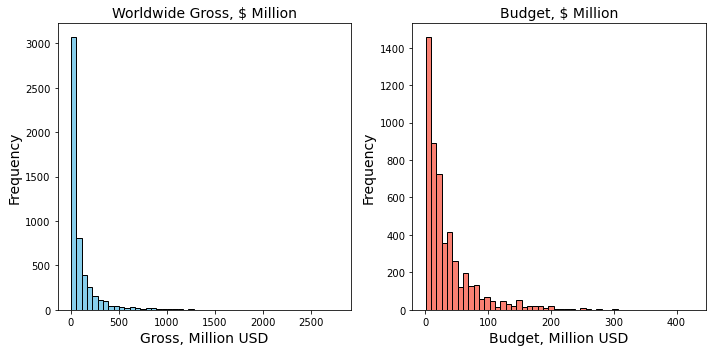

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) 

# Plot the first histogram
axes[0].hist(movie_budgets_df['gross_usd_mil'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Gross, Million USD', fontsize = 14)
axes[0].set_ylabel('Frequency', fontsize = 14)
axes[0].set_title('Worldwide Gross, $ Million', fontsize = 14)

# Plot the second histogram
axes[1].hist(movie_budgets_df['budget_usd_mil'], bins=50, color='salmon', edgecolor='black')
axes[1].set_xlabel('Budget, Million USD', fontsize = 14)
axes[1].set_ylabel('Frequency', fontsize = 14)
axes[1].set_title('Budget, $ Million', fontsize = 14)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### Filtering out movies before 2000 and renaming columns.

In [45]:
movie_budgets_df_y2k = movie_budgets_df[movie_budgets_df['year']>=2000]

# select subset of columns then remove nans
cols_of_interest = ['movie', 'year', 'month', 'net_profit_usd_mil', 'budget_usd_mil', 'gross_usd_mil', 'roi_pct']
movie_budgets_df_clean = movie_budgets_df_y2k[cols_of_interest].dropna()

# Rename the 'movie' column to 'title'
movie_budgets_df_clean.rename(columns={'movie':'title'}, inplace=True)
movie_budgets_df_clean.head()

,title,year,month,net_profit_usd_mil,budget_usd_mil,gross_usd_mil,roi_pct
id,,,,,,,
1,Avatar,2009,12,2351.345279,425.0,2776.345279,553.257713
2,Pirates of the Caribbean: On Stranger Tides,2011,5,635.063875,410.6,1045.663875,154.667286
3,Dark Phoenix,2019,6,-200.237650,350.0,149.762350,-57.210757
4,Avengers: Age of Ultron,2015,5,1072.413963,330.6,1403.013963,324.384139
5,Star Wars Ep. VIII: The Last Jedi,2017,12,999.721747,317.0,1316.721747,315.369636


### 3.3.3. Combining IMDB and Budget Dataframes.

In the next segment of data cleaning we'll be transforming the movie titles in `movie_budgets_df_clean` and `imdb_df`, the movie titles are the only possible key we can use to merge the datasets.

Let's see how much movie title cleaning we might need to do before merging.
We'll check how many movie titles from `movie_budgets_df_clean` are missing in `imdb_df`.

It looks like about 2000 movies with budgets were not found in IMDB and 1725 were found.

In [46]:
# how many movie titles from budget df are present in IMDB df
movie_budgets_df_clean[movie_budgets_df_clean['title'].isin(imdb_df.title)]

,title,year,month,net_profit_usd_mil,budget_usd_mil,gross_usd_mil,roi_pct
id,,,,,,,
1,Avatar,2009,12,2351.345279,425.00,2776.345279,553.257713
2,Pirates of the Caribbean: On Stranger Tides,2011,5,635.063875,410.60,1045.663875,154.667286
3,Dark Phoenix,2019,6,-200.237650,350.00,149.762350,-57.210757
4,Avengers: Age of Ultron,2015,5,1072.413963,330.60,1403.013963,324.384139
7,Avengers: Infinity War,2018,4,1748.134200,300.00,2048.134200,582.711400
...,...,...,...,...,...,...,...
15,Drunk Wedding,2015,5,-0.596699,0.60,0.003301,-99.449833
16,They Will Have to Kill Us First,2016,3,-0.592057,0.60,0.007943,-98.676167
22,The Harvest/La Cosecha,2011,7,-0.556291,0.56,0.003709,-99.337679


In [47]:
# how many movie titles from budget df are missing  in IMDB df
movie_budgets_df_clean[~movie_budgets_df_clean['title'].isin(imdb_df.title)]

,title,year,month,net_profit_usd_mil,budget_usd_mil,gross_usd_mil,roi_pct
id,,,,,,,
5,Star Wars Ep. VIII: The Last Jedi,2017,12,999.721747,317.00,1316.721747,315.369636
6,Star Wars Ep. VII: The Force Awakens,2015,12,1747.311220,306.00,2053.311220,571.016739
8,Pirates of the Caribbean: At Worldâs End,2007,5,663.420425,300.00,963.420425,221.140142
16,Spider-Man 3,2007,5,636.860230,258.00,894.860230,246.845050
20,Harry Potter and the Half-Blood Prince,2009,7,685.213767,250.00,935.213767,274.085507
...,...,...,...,...,...,...,...
95,B-Girl,2010,1,-0.698840,0.70,0.001160,-99.834286
1,That Way Madness Lies,2018,12,-0.648553,0.65,0.001447,-99.777385
4,Starsuckers,2009,12,-0.625188,0.64,0.014812,-97.685625


### Supplimentary functions designed to 1) clean movie titles in both tables and 2) find closest match within movie release year.
We'll be using [SequenceMatcher module](https://docs.python.org/3/library/difflib.html#sequencematcher-objects) to get a similarity metrics between two strrings.

We'll define two supplemental functions:  `preprocess_title` that will create a lower-case punctuation-free version of input `title`, and `find_closest_match`, that will use a single `row` (1-row dataframe with year and preprocessed title) to compare against the dataframe `df2` 's  year and perprocessed title columns. 

The `find_closest_match` subfunction will filter `df2` to have entries from `row[year]`.
Then function will iterate over `df2['title_preprocessed']`, comparing each element with `row['title_preprocessed']` using `SequenceMatcher` module. 
The result of comparision is the similarity index (0-1), it will be stored in a list in the comparision order. 
We then find the max similarity index and return the closest matching title  `df2[max_index, 'title_preprocessed']`.

In [48]:
# stripping titles and finding closest match
import string
from difflib import SequenceMatcher

# function to preprocess title
def preprocess_title(title):
    # remove punctuation and convert to lowercase
    title = title.translate(str.maketrans('', '', string.punctuation)).lower()
    return title

# function to find the closest match between row (name) and df2 (columns with year and title)
def find_closest_match(row, df2):
    #select subset of a year 
    df2_subset = df2[df2['year'] == row['year']]
    string1 = row['title_preprocessed']
    # List to store similarity ratios
    ratios = []
    
    # iterate over each title in df2_subset
    for title in df2_subset['title_preprocessed']:
        # Create a SequenceMatcher object
        matcher = SequenceMatcher(None, string1, title)
        # Calculate similarity ratio and append to ratios list
        ratios.append(matcher.ratio())
    # if not empty 
    if ratios:
        # find index of highest similarity ratio
        max_index = ratios.index(max(ratios))
        # return the title corresponding to the highest similarity ratio
        closest_title = df2_subset.iloc[max_index]['title_preprocessed']
        return closest_title
    else:
        return None

#### Apply title pre-processing function to both dataframes.

In [49]:
# add preprocessed title for both dataframes
movie_budgets_df_clean.loc[:, 'title_preprocessed'] = \
movie_budgets_df_clean['title'].apply(preprocess_title).copy()

imdb_df.loc[:, 'title_preprocessed'] = imdb_df['title'].apply(preprocess_title).copy()

# find titles not found in IMDb (using enture budgets df)
found_in_imdb_df = movie_budgets_df_clean

#### Find closest title match .
Thi is a slow-running function, please allow 2-3 minutes to complete.

In [50]:
# find closest match
found_in_imdb_df.loc[:, 'closest_match'] = \
    movie_budgets_df_clean.apply(find_closest_match, args=(imdb_df,), axis=1)

#### Select a subset of columns from df with movie budgets to be merged with `imdb_df`.

In [51]:
budget_cols = ['month','closest_match', 'net_profit_usd_mil', 'budget_usd_mil', \
               'gross_usd_mil', 'roi_pct',]
imdb_budget_df = pd.merge(found_in_imdb_df[budget_cols], imdb_df, \
                     left_on='closest_match', right_on='title_preprocessed', how='inner')

### Recapping the IMDB and Movie Budgets dataframes cleaning and merging.

* For `imdb` df, we aggregated cast and crew members for each movie into a single string (one string for cast and 3 types of crew) and single column (dedicated column for cast and 3 types of crew: 4 nrew columns total).
* We then added 4 new columns with cast and crew back to the IMDB frame.
* We removed all duplicate entries from IMDB Frame.
* We split genres column into two: primary and secondary genres. 
* We filtered out movies released prior to 2000.
* We filtered out movies that are too short or too long.
* We selected a subset of columns from IMDB Frame to be used for the analysis.
* We created a column with pre-processed movie title, containing lower-case punctuation-free version of movie title. 
* For `movie_budgets`, we separated release column into release month and release year.
* We converted budgets and box office gross columns to integers and divided by `1e+06` to operate in millions.
* We filtered out movies released before 2000.
* We renamed colums.
* We created a column with pre-processed movie title, containing lower-case punctuation-free version of movie title. 

Finally,

* We merged two dataframes using closest match of pre-processed movie title and release year. 


In [52]:
# display the merged dataframe
imdb_budget_df.head()

,month,closest_match,net_profit_usd_mil,budget_usd_mil,gross_usd_mil,roi_pct,movie_id,title,year,avg_rating,total_votes,duration_min,cast_names,producers,writers,directors,genre1,genre2,title_preprocessed
0,5,pirates of the caribbean on stranger tides,635.063875,410.6,1045.663875,154.667286,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011,6.6,447624,136.0,"Johnny Depp, Geoffrey Rush, Penélope Cruz, Ian...",NaN,"Stuart Beattie, Ted Elliott, Tim Powers, Terry...",Rob Marshall,Action,Adventure,pirates of the caribbean on stranger tides
1,6,dark phoenix,-200.237650,350.0,149.762350,-57.210757,tt6565702,Dark Phoenix,2019,6.0,24451,113.0,"Nicholas Hoult, James McAvoy, Michael Fassbend...",NaN,"John Byrne, Jack Kirby, Stan Lee, Chris Clarem...",Simon Kinberg,Action,Adventure,dark phoenix
2,5,avengers age of ultron,1072.413963,330.6,1403.013963,324.384139,tt2395427,Avengers: Age of Ultron,2015,7.3,665594,141.0,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",Kevin Feige,"Jack Kirby, Stan Lee, Joe Simon, Jim Starlin",Joss Whedon,Action,Adventure,avengers age of ultron
3,12,star wars the last jedi,999.721747,317.0,1316.721747,315.369636,tt2527336,Star Wars: The Last Jedi,2017,7.1,462903,152.0,"Carrie Fisher, Mark Hamill, John Boyega, Daisy...","Kathleen Kennedy, Ram Bergman",George Lucas,Rian Johnson,Action,Adventure,star wars the last jedi
4,12,star wars episode vii the force awakens,1747.311220,306.0,2053.311220,571.016739,tt2488496,Star Wars: Episode VII - The Force Awakens,2015,8.0,784780,136.0,"Oscar Isaac, Domhnall Gleeson, John Boyega, Da...","Kathleen Kennedy, Bryan Burk","George Lucas, Lawrence Kasdan, Michael Arndt",J.J. Abrams,Action,Adventure,star wars episode vii the force awakens


### 3.3.4. Cleaning Content Rating Dataframe

We'll apply same cleaning procedure:
   * Split genres column into separate genres.
   * Convert budget and gross to millions.
   * Filter out movies before 2000.
   * Rename columns to match the data naming scheme.
   * Select a subset of relevant columns.
   * Remove NaNs from the subset.

In [53]:
movie_content_rating_df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
color,,,,,,,,,,,,,,,,,,,,,
Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


#### Splitting genres, filtering out old movies, selecting a subset of columns.

In [54]:
# Split the genres column by comma and expand it into two separate columns
genre_split = movie_content_rating_df['genres'].str.split('|', expand=True)

# Assign the first two columns of the genre_split DataFrame to new columns in df
movie_content_rating_df['genre1'] = genre_split[0]
movie_content_rating_df['genre2'] = genre_split[1]
# replace Science Fiction and replace with Sci-Fi
movie_content_rating_df['genre1'] = movie_content_rating_df['genre1'].str.replace('Science Fiction', 'Sci-Fi')
movie_content_rating_df['genre2'] = movie_content_rating_df['genre2'].str.replace('Science Fiction', 'Sci-Fi')

movie_content_rating_df = movie_content_rating_df[movie_content_rating_df['title_year']>=2000]
movie_content_rating_df = movie_content_rating_df.drop_duplicates(subset=['budget', 'title_year'], keep='first')
cols_to_keep = ['genre1', 'genre2', 'content_rating', 'budget', 'gross']
content_rating_df = movie_content_rating_df[cols_to_keep]

#### Removing NaNs, renaming columns, converting dollars to millions.

In [55]:
content_rating_clean_df = content_rating_df.dropna().copy()
content_rating_clean_df['net_profit'] = content_rating_clean_df['gross'] - content_rating_clean_df['budget']
content_rating_clean_df['net_profit_usd_mil'] = content_rating_clean_df['net_profit']/1e+06
content_rating_clean_df['gross_usd_mil'] = content_rating_clean_df['gross']/1e+06
content_rating_clean_df['budget_usd_mil'] = content_rating_clean_df['budget']/1e+06
content_rating_clean_df.shape

(1114, 9)

#### Supplemental function plotting content rating distribution in a  dataframe.
Supplemental function that will plot an enhanced histogram of content rating distribution.

In [56]:
# plotting content rating distribution.
#INPUT
# data: dataframe with content rating 'content_rating' column
# title: plot title
# height
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1, 1, figsize=(15, 7))
    if h_lim:
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data, color='#d0d0d0', width=0.6, edgecolor = 'black')

    color = ['green', 'blue', 'orange', 'red']
    span_range = [[0, 1], [2, 2], [3, 3], [4, 4]]  # Adjusted span_range for 0-4 rating

    for idx, sub_title in enumerate(['Kids', 'Pre-Teens', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy = (sum(span_range[idx])/2, height),
                    xytext = (0,0), textcoords='offset points',
                    va = 'center', ha = 'center',
                    color ='w', fontsize=16, fontweight='bold',
                    bbox = dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6));
        ax.axvspan(span_range[idx][0]-0.4, span_range[idx][1]+0.4, color=color[idx], alpha=0.1);

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03));
    plt.show()

#### Distribution of content rating in `content_rating_clean_df`.

Plotting because it's a neat plot.

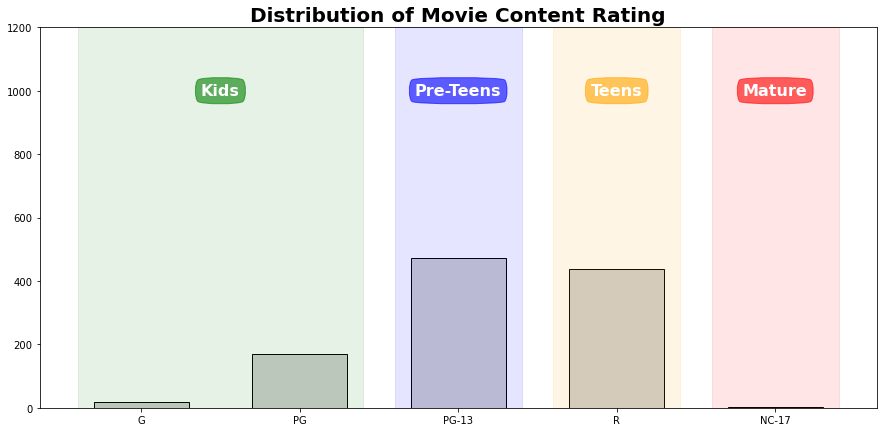

<Figure size 432x288 with 0 Axes>

In [57]:
# get content rating disribution
movie_rating = content_rating_clean_df['content_rating'].value_counts();
# order from kids to adults
rating_order = [label for label in \
                ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', \
                 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', \
                 'R', 'NC-17', 'TV-MA'] if label in movie_rating.index];
# plot
rating_barplot(movie_rating[rating_order], "Movie Content", 1000, 1200);
# save figure
plt.savefig(os.path.join(path_dir_results, "CLEAN_Movie_Ratings.png"));

### 3.3.5. Cleaning TMDB Dataframe


Here we're going to follow the `imdb` protocol on cast/crew aggregation, genre splitting, year filtering.
Fortunately, the dataframe already contains budgets and gross profits and we won't have to do any additional merging.
We'll add a count of critically acclaimed cast or crew members to TMDB dataframe.
As last step, we keep relevant columns, follow column naming schema remove duplicates and drop NaNs.

In [58]:
tmdb_movies_rated_df.head()
# Note the movie df has two titles, we'll address it later.

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [59]:
subset_cols = ['id', 'budget', 'genres', 'original_language', 'original_title', \
               'release_date', 'revenue', 'vote_average', 'vote_count', 'runtime', \
              'cast', 'crew'] 
tmdb_subset_df = tmdb_movies_rated_df[subset_cols].copy()
tmdb_subset_df.shape

(4803, 12)

#### Mark negative budget and revenue columns with NaNs, remove duplicates, drop NaNs.

In [60]:
tmdb_subset_df.loc[tmdb_subset_df['budget'].astype(int) <= 0, 'budget'] = None
tmdb_subset_df.loc[tmdb_subset_df['revenue'] <= 0, 'revenue'] = None
tmdb_subset_df = tmdb_subset_df.drop_duplicates(subset=['id', 'release_date'], keep='first')
tmdb_subset_df.dropna(inplace=True)
tmdb_subset_df.shape

(3229, 12)

####  Split `release_date` column into year and month, filter out movies prior to 2000.

In [61]:
tmdb_subset_df['release_date'] = pd.to_datetime(tmdb_subset_df['release_date'])
tmdb_subset_df['year'] = tmdb_subset_df['release_date'].dt.year.astype(int)
tmdb_subset_df['month'] = tmdb_subset_df['release_date'].dt.month.astype(int)

tmdb_filtered_df = tmdb_subset_df[tmdb_subset_df['year']>=2000].copy()
tmdb_filtered_df.head()

,id,budget,genres,original_language,original_title,release_date,revenue,vote_average,vote_count,runtime,cast,crew,year,month
0,19995,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Avatar,2009-12-10,2.787965e+09,7.2,11800,162.0,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009,12
1,285,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,Pirates of the Caribbean: At World's End,2007-05-19,9.610000e+08,6.9,4500,169.0,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007,5
2,206647,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Spectre,2015-10-26,8.806746e+08,6.3,4466,148.0,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015,10
3,49026,250000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,The Dark Knight Rises,2012-07-16,1.084939e+09,7.6,9106,165.0,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",2012,7
4,49529,260000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,John Carter,2012-03-07,2.841391e+08,6.1,2124,132.0,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",2012,3


### Define supplemental functions to extract cast and crew information.

In the dataframe, genres, cast, and crew are stored as a list of dictionaries converted to string.
We'll be using [abstract syntax tree package](https://docs.python.org/3/library/ast.html).

Function `get_first_n_cast_names(row, n)` will convert string `row` to list of dictionaries, it will iterate over first `N` elemns of the list and extract the values of `name` keys.

Function `get_names_crew(row, jobRole)` will do a similar task of converting string to list of dictionaries and extracting values stored in key `name`. The small difference is that it first will check the value of `job` key against `jobRole` and extract `name` fora specific job role (like `producer`, or `director`).

Cast dictionary does not have a job role, so we need two separate functions to do the extraction.
We can reuse the cast-extracting function to collect genres.

In [62]:
# importing AST module
import ast

# extracts N names from  
def get_first_n_cast_names(row, n):
    list_of_cast_dicts = ast.literal_eval(row) 
    # list comprehension to extract the first n names and join them
    first_n_names = ', '.join(dictionary['name'] for dictionary in list_of_cast_dicts[:n])
    return first_n_names

# extracts names from jobRole key. 
def get_names_crew(row, jobRole):
    # convert the string representation of list of dictionaries back to a list of dictionaries
    list_of_crew_dicts = ast.literal_eval(row)
    # use list comprehension to filter and extract names of crew members with the specified job role
    crew_names = ', '.join(dictionary['name'] for dictionary in list_of_crew_dicts if dictionary.get('job') == jobRole) 
    return crew_names

#### Extracting cast, crew, genres.

In [63]:
# Apply the function to the cast column containing lists of dictionaries
tmdb_filtered_df['cast_names'] = tmdb_filtered_df['cast'].apply(get_first_n_cast_names, args=(10,))

In [64]:
# Apply the function to the crew column containing lists of dictionaries
tmdb_filtered_df['producer'] = tmdb_filtered_df['crew'].apply(get_names_crew, args=('Producer',))
tmdb_filtered_df['director'] = tmdb_filtered_df['crew'].apply(get_names_crew, args=('Director',))
tmdb_filtered_df['screenplay'] = tmdb_filtered_df['crew'].apply(get_names_crew, args=('Screenplay',))

In [65]:
# Apply the function to the genres column containing lists of dictionaries
tmdb_filtered_df['genres'] = tmdb_filtered_df['genres'].apply(get_first_n_cast_names, args=(3,))

In [66]:
tmdb_filtered_df.head()

,id,budget,genres,original_language,original_title,release_date,revenue,vote_average,vote_count,runtime,cast,crew,year,month,cast_names,producer,director,screenplay
0,19995,237000000.0,"Action, Adventure, Fantasy",en,Avatar,2009-12-10,2.787965e+09,7.2,11800,162.0,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009,12,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","James Cameron, Jon Landau",James Cameron,James Cameron
1,285,300000000.0,"Adventure, Fantasy, Action",en,Pirates of the Caribbean: At World's End,2007-05-19,9.610000e+08,6.9,4500,169.0,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007,5,"Johnny Depp, Orlando Bloom, Keira Knightley, S...","Jerry Bruckheimer, Eric McLeod, Chad Oman, Pet...",Gore Verbinski,"Ted Elliott, Terry Rossio"
2,206647,245000000.0,"Action, Adventure, Crime",en,Spectre,2015-10-26,8.806746e+08,6.3,4466,148.0,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015,10,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...","Barbara Broccoli, Michael G. Wilson",Sam Mendes,"John Logan, Robert Wade, Neal Purvis, Jez Butt..."
3,49026,250000000.0,"Action, Crime, Drama",en,The Dark Knight Rises,2012-07-16,1.084939e+09,7.6,9106,165.0,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",2012,7,"Christian Bale, Michael Caine, Gary Oldman, An...","Charles Roven, Christopher Nolan, Emma Thomas",Christopher Nolan,"Christopher Nolan, Jonathan Nolan"
4,49529,260000000.0,"Action, Adventure, Science Fiction",en,John Carter,2012-03-07,2.841391e+08,6.1,2124,132.0,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",2012,3,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...","Colin Wilson, Jim Morris, Lindsey Collins",Andrew Stanton,"Andrew Stanton, Michael Chabon, Mark Andrews"


### Cleaning and pre-processing Awards dataframes.

Below we're going to drop NaNs from dataframes, leave relevant award categories.
Note that `oscars_df` is a relatively clean dataset when it comes to nominee names, but `golden_globes_df` contains a mix of names and award categories. 
We're not interested in cleaning it as much as possible, so we're going to use a regexp pattern matching `FirstName LastName` to extract names of winners and nominees.

In [67]:
golden_globes_df.name.head(20)

year_film
1927        Richard Barthelmess
1927              Emil Jannings
1927             Louise Dresser
1927               Janet Gaynor
1927             Gloria Swanson
1927              Rochus Gliese
1927    William Cameron Menzies
1927               Harry Oliver
1927              George Barnes
1927             Charles Rosher
1927                Karl Struss
1927            Lewis Milestone
1927                  Ted Wilde
1927              Frank Borzage
1927             Herbert Brenon
1927                 King Vidor
1927             Ralph Hammeras
1927                Roy Pomeroy
1927           Nugent Slaughter
1927          The Caddo Company
Name: name, dtype: object

In [68]:
oscars_df.dropna(inplace=True)
oscars_df.head()

,year_award,ceremony,category,nominee,film,win
year_film,,,,,,
1943,1944,1,Best Performance by an Actress in a Supporting...,Katina Paxinou,For Whom The Bell Tolls,True
1943,1944,1,Best Performance by an Actor in a Supporting R...,Akim Tamiroff,For Whom The Bell Tolls,True
1943,1944,1,Best Director - Motion Picture,Henry King,The Song Of Bernadette,True
1943,1944,1,Actress In A Leading Role,Jennifer Jones,The Song Of Bernadette,True
1943,1944,1,Actor In A Leading Role,Paul Lukas,Watch On The Rhine,True


In [69]:
golden_globes_df.dropna(inplace=True)
golden_globes_df.head()

,year_ceremony,ceremony,category,name,film,winner
year_film,,,,,,
1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


#### Define award categories we're interested.
We'll filter out award categores we're not interested in: in both dataframes convert category names to lowercase and compare with our list of relevant categories.

In [70]:
# get winners and nominants from awards frames
categories_of_interest = ['actress', 'actor', 'directing', 'director', 'writing', 'screenplay', \
                          'producer']
oscars_df['category'] = oscars_df['category'].str.lower()
golden_globes_df['category'] = golden_globes_df['category'].str.lower()

oscars_df = oscars_df[oscars_df['category'].str.contains('|'.join(categories_of_interest), case=False)]
golden_globes_df_filtered = golden_globes_df[golden_globes_df['category'].isin(categories_of_interest)]

#### Here we're going to filter awards frames into frames with nominees and frames with winners.

In [71]:
winners_oscar_df = oscars_df[oscars_df['win'] == True]
nominated_oscar_df = oscars_df[oscars_df['win'] == False]

winners_gg_df = golden_globes_df[golden_globes_df['winner'] == True]
nominated_gg_df = golden_globes_df[golden_globes_df['winner'] == False]

#### For the `golden_globes_df` frame, we're going to create two lists of winners and nominees matching regexp pattern.
We then merge them with similar lists from `oscars_df`.

In [72]:
import re

## define a pattern to match entries with two words
pattern = r'^\s*\w+\s+\w+\s*$'

# filter the list to keep only entries matching the pattern
filtered_list_gg_winner = [entry for entry in winners_gg_df['name'] if re.match(pattern, entry.lower())]
filtered_list_gg_nominee = [entry for entry in nominated_gg_df['name'] if re.match(pattern, entry.lower())]

#### Creating two pooles lists of nominees and winners.

In [73]:
# create a set of names of everyone who won an Oscar or Golden Globe
all_winners_set = set(filtered_list_gg_winner + list(winners_oscar_df['nominee'].str.lower()))
# create a set of names of everyone who got nominated for an Oscar or Golden Globe
all_nominated_set = set(filtered_list_gg_nominee + list(nominated_oscar_df['nominee'].str.lower()))

### Supplemented function to check if `names_string` is in the `awards_list`.

Function will separate names by `,` in `names_string` and check if they are present in `awards_list`, either nominaed or awarded list. Function will return the combined number of awards or nominantions for the entire string.


In [74]:
# check if name was in awards list
def check_nominated_characters(names_string, awards_list):
    if pd.isna(names_string):
        return 0
    name_list = [name.strip().lower() for name in names_string.split(',')]
    award_count = 0;
    for n in name_list:
        if n in awards_list:
            award_count += 1
    return award_count

#### Add columns with cast nominations/awards.

In [75]:
# apply the function to the cast, crew and create a new column indicating whether any cast/crew was nominated
tmdb_filtered_df['cast_nominated'] = \
tmdb_filtered_df['cast_names'].apply(check_nominated_characters, args=(all_nominated_set,))

tmdb_filtered_df['cast_awarded'] = \
tmdb_filtered_df['cast_names'].apply(check_nominated_characters, args=(all_winners_set,))

#### Add columns with cast nominations/awards.

In [76]:
# add columns for nominated crew members
tmdb_filtered_df['producer_nominated'] = \
tmdb_filtered_df['producer'].apply(check_nominated_characters, args=(all_nominated_set,))
tmdb_filtered_df['director_nominated'] = \
tmdb_filtered_df['director'].apply(check_nominated_characters, args=(all_nominated_set,))
tmdb_filtered_df['screenplay_nominated'] = \
tmdb_filtered_df['screenplay'].apply(check_nominated_characters, args=(all_nominated_set,))

# add columns for awarded crew members
tmdb_filtered_df['producer_awarded'] = \
tmdb_filtered_df['producer'].apply(check_nominated_characters, args=(all_winners_set,))
tmdb_filtered_df['director_awarded'] = \
tmdb_filtered_df['director'].apply(check_nominated_characters, args=(all_winners_set,))
tmdb_filtered_df['screenplay_awarded'] = \
tmdb_filtered_df['screenplay'].apply(check_nominated_characters, args=(all_winners_set,))

#### Splitting `genres `column into `genre1` and `genre2`.
If second genre `genre2` is missing, replace it with the first genre `genre1`.

In [77]:
# split the genres column by comma and expand it into two separate columns
genre_split = tmdb_filtered_df['genres'].str.split(',', expand=True)

# assign the first two columns of the genre_split DataFrame to new columns in df
tmdb_filtered_df['genre1'] = genre_split[0].str.strip(' ').copy()
tmdb_filtered_df['genre2'] = genre_split[2].str.strip(' ').copy()

# replace 'None' values in genre2 column with corresponding values from genre1 column
tmdb_filtered_df['genre2'].fillna(tmdb_filtered_df['genre1'], inplace=True)

In [78]:
tmdb_filtered_df['genre1'].value_counts

<bound method IndexOpsMixin.value_counts of 0                Action
1             Adventure
2                Action
3                Action
4                Action
             ...       
4742        Documentary
4752            Romance
4758           Thriller
4772              Drama
4796    Science Fiction
Name: genre1, Length: 2282, dtype: object>

#### Replace `Science Fiction` with `Sci-Fi`

In [79]:
# replace Science Fiction and replace with Sci-Fi
tmdb_filtered_df['genre1'] = tmdb_filtered_df['genre1'].str.replace('Science Fiction', 'Sci-Fi')
tmdb_filtered_df['genre2'] = tmdb_filtered_df['genre2'].str.replace('Science Fiction', 'Sci-Fi')

#### Converting budgets to millions, renaming columns to match the schema.

In [80]:
columns_to_keep = ['genre1', 'genre2', 'original_title', \
                   'vote_average', 'vote_count', 'runtime',
                   'year','month', 'cast_nominated', 'cast_awarded', \
                   'producer_nominated', 'producer_awarded', \
                  'director_nominated', 'director_awarded', \
                  'screenplay_nominated', 'screenplay_awarded', \
                   'cast_names', 'producer', 'director', 'screenplay']

tmdb_clean_df = tmdb_filtered_df[columns_to_keep].copy()
# convert budget, revenue to millions
tmdb_clean_df.loc[:, 'budget_usd_mil'] = tmdb_filtered_df['budget']/1e+06
tmdb_clean_df.loc[:, 'gross_usd_mil'] = tmdb_filtered_df['revenue']/1e+06
# add net profit, roi
tmdb_clean_df.loc[:, 'net_profit_usd_mil'] = (tmdb_clean_df['gross_usd_mil'] - tmdb_clean_df['budget_usd_mil'])
tmdb_clean_df.loc[:, 'roi_pct'] = 100*tmdb_clean_df['net_profit_usd_mil']/tmdb_clean_df['budget_usd_mil']

#### Add columns containing total nominations and awards for cast and crew combined, and for crew awards only.

In [81]:
# add total nominations
tmdb_clean_df['total_nominations'] = tmdb_clean_df['cast_nominated'] + \
    tmdb_clean_df['producer_nominated'] + \
    tmdb_clean_df['director_nominated'] + \
    tmdb_clean_df['screenplay_nominated']

# add total awards
tmdb_clean_df['total_awards'] = tmdb_clean_df['cast_awarded'] + \
                                     tmdb_clean_df['producer_awarded'] + \
                                     tmdb_clean_df['director_awarded'] + \
                                     tmdb_clean_df['screenplay_awarded']
tmdb_clean_df['crew_awards'] =  tmdb_clean_df['producer_awarded'] + \
                                     tmdb_clean_df['director_awarded'] + \
                                     tmdb_clean_df['screenplay_awarded']


tmdb_clean_df.head()

,genre1,genre2,original_title,vote_average,vote_count,runtime,year,month,cast_nominated,cast_awarded,...,producer,director,screenplay,budget_usd_mil,gross_usd_mil,net_profit_usd_mil,roi_pct,total_nominations,total_awards,crew_awards
0,Action,Fantasy,Avatar,7.2,11800,162.0,2009,12,1,1,...,"James Cameron, Jon Landau",James Cameron,James Cameron,237.0,2787.965087,2550.965087,1076.356577,4,4,3
1,Adventure,Action,Pirates of the Caribbean: At World's End,6.9,4500,169.0,2007,5,4,4,...,"Jerry Bruckheimer, Eric McLeod, Chad Oman, Pet...",Gore Verbinski,"Ted Elliott, Terry Rossio",300.0,961.000000,661.000000,220.333333,4,4,0
2,Action,Crime,Spectre,6.3,4466,148.0,2015,10,5,2,...,"Barbara Broccoli, Michael G. Wilson",Sam Mendes,"John Logan, Robert Wade, Neal Purvis, Jez Butt...",245.0,880.674609,635.674609,259.459024,7,3,1
3,Action,Drama,The Dark Knight Rises,7.6,9106,165.0,2012,7,7,6,...,"Charles Roven, Christopher Nolan, Emma Thomas",Christopher Nolan,"Christopher Nolan, Jonathan Nolan",250.0,1084.939099,834.939099,333.975640,10,6,0
4,Action,Sci-Fi,John Carter,6.1,2124,132.0,2012,3,5,2,...,"Colin Wilson, Jim Morris, Lindsey Collins",Andrew Stanton,"Andrew Stanton, Michael Chabon, Mark Andrews",260.0,284.139100,24.139100,9.284269,5,2,0


### Recapping the `tmdb`  dataframe cleaning and transformations.

* We split release date into month and year.
* We converted budget and revenue into millions USD.
* We added revenue and net profit columns.
* We filtered out movies prior to 2000.
* We removed enreies with NaNs.
* We extracted names of cast and crew from list of dictionaries. For crew, we created 3 distinct columns for producers, directors, and writers.
* From two awards dataframes, we created a list of nominated cast/crew persons and a list of awarded cast/crew persons.
* We checked cast/crew names in `tmdb` against the nominated and awarded lists and added a number of nominations/awards for each movie.
* Finally, we have renamed columns to match the namig schema.

### 3.3.6. Historic trends.

Below we'll use plotting to check historic profit trends for both `imdb` and `tmdb` datasets.

### Supplemental function to plot average historic budget and revenue data.
Since we applied same naming schema for both dataframes, we can define a plotting function that would work on both. 

In [82]:
# historic trends: movie budgets and profits
def plot_historic_trend(df):
    # group by year and aggregate
    grouped_by_year = df.groupby('year').agg({
        'budget_usd_mil': 'mean',
        'net_profit_usd_mil': 'mean',
        'gross_usd_mil': 'mean'
    }).reset_index()

    # melt the df to plot multiple variables
    melted_df = pd.melt(grouped_by_year, id_vars='year', \
                    value_vars=['budget_usd_mil', 'net_profit_usd_mil', 'gross_usd_mil'],
                    var_name='Metric', value_name='Amount')
    
    # Plot using seaborn
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=melted_df, x='year', y='Amount', hue='Metric')
    plt.xlabel('Year', fontsize = 14)
    plt.ylabel('USD, millions', fontsize = 14)
    plt.title('Trends of Movie Budgets, Profits, and Net Profits by Year', fontsize = 14)
    plt.legend(['Avg Budget', 'Avg Net Profit', 'Profits'], fontsize = 14);
    plt.grid(True);
    return plt

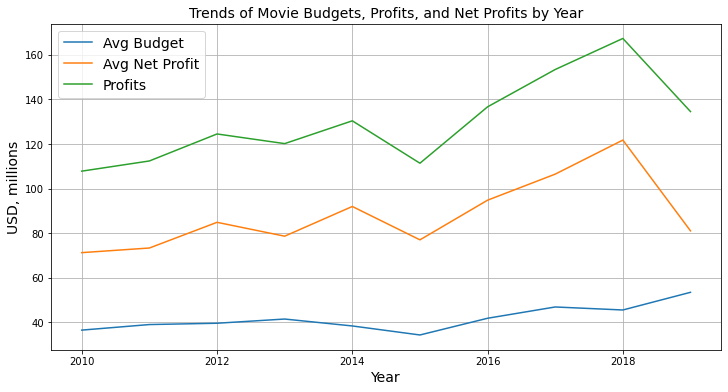

In [83]:
# Historic trends: movie budgets and profits IMDB
plt_imdb = plot_historic_trend(imdb_budget_df)
plt_imdb.savefig(os.path.join(path_dir_results, 'IMDB_Historic_Trends_Budget_Profit_plot.jpg'))

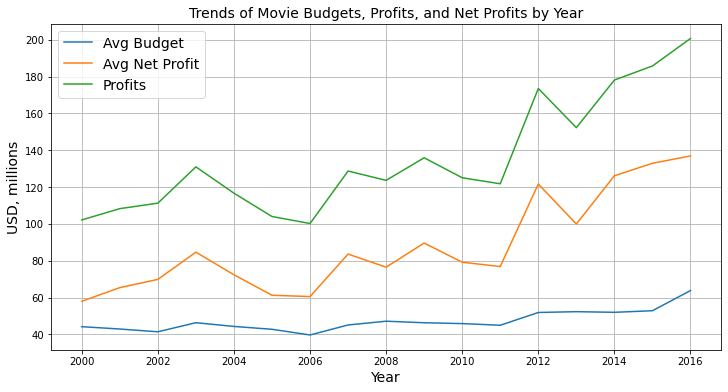

In [84]:
# Historic trends: movie budgets and profits TMDB
plt_tmdb = plot_historic_trend(tmdb_clean_df);
plt_tmdb.savefig(os.path.join(path_dir_results, 'TMDB_Historic_Trends_Budget_Profit_plot.jpg'));

Looks like `tmdb_clean_df` has the most information but lacks the most recent data.

### 3.3.8. Check all-time top 10 profitable genres and budgets.

Again' we'll use both `imdb_budget_df` and `tmdb_clean_df` dataframes.

### Supplemental function to plot genres with largest profits for all times (since 2000).
Inside the function we'll group budgets and revenues by `genre1`, sum them up and plot genres with 10 largest profits. We'll add budget and return ling to plot (for saving).

In [85]:
# plots budgets and gross profits by genres 
def plot_budgets_profits_top10(df):
    grouped_by_genre_all_time =\
        df.groupby('genre1').agg({'budget_usd_mil': 'sum', 'gross_usd_mil': 'sum'}).reset_index()

    # sort the df by total budget and total profit in ascending order
    grouped_by_genre_sorted_all_time = \
        grouped_by_genre_all_time.sort_values(by=['budget_usd_mil', 'gross_usd_mil'], ascending=[False, False])
    # calculate average rating for each genre
    top_10_genres_sum = grouped_by_genre_sorted_all_time.head(10).copy()
    # convert to billions
    top_10_genres_sum.loc[:, 'budget_usd_mil'] = top_10_genres_sum.loc[:, 'budget_usd_mil']/1e+03
    top_10_genres_sum.loc[:, 'gross_usd_mil'] = top_10_genres_sum.loc[:, 'gross_usd_mil']/1e+03

    palette = sns.color_palette('husl', n_colors=len(top_10_genres_sum))

    plt.figure(figsize=(10, 10))
    sns.barplot(x='genre1', y='budget_usd_mil', data=top_10_genres_sum, hue='genre1', \
            palette=palette, dodge=False)
    sns.barplot(x='genre1', y='gross_usd_mil', data=top_10_genres_sum, hue='genre1', \
            palette=palette, alpha=0.5, dodge=False)
    plt.xlabel('Movie Genres', fontsize=18)
    plt.ylabel('Billions', fontsize=18)
    plt.title('All-time Budget and Profit by Genre', fontsize=20)
    plt.yticks(fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=14)

    # Add legend only for 'gross_usd_mil' data
    handles, labels = plt.gca().get_legend_handles_labels();
    gross_legend = \
    plt.legend(handles[len(top_10_genres_sum):], labels[len(top_10_genres_sum):], title='Genre', fontsize=15)
    plt.gca().add_artist(gross_legend);
    return plt

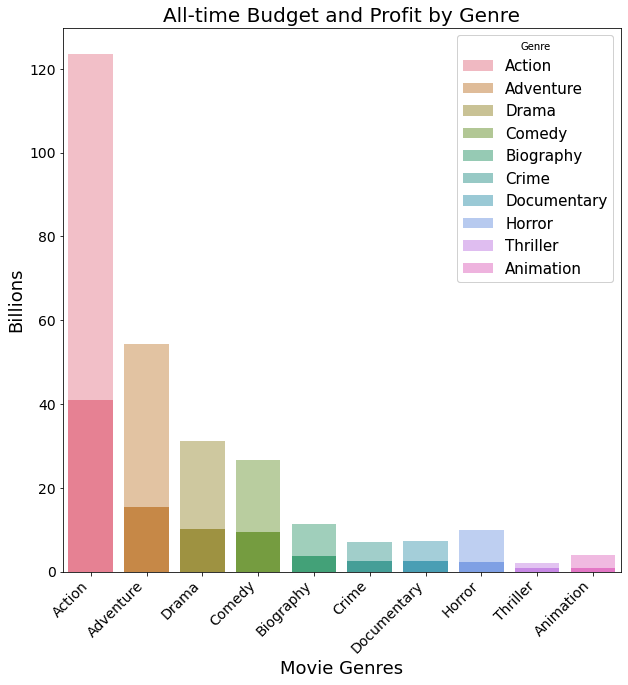

In [86]:
# Plotting IMDB
plt_imdb = plot_budgets_profits_top10(imdb_budget_df)
plt_imdb.savefig(os.path.join(path_dir_results, 'IMDB_All_time_Budget_Gross_plot.jpg'));

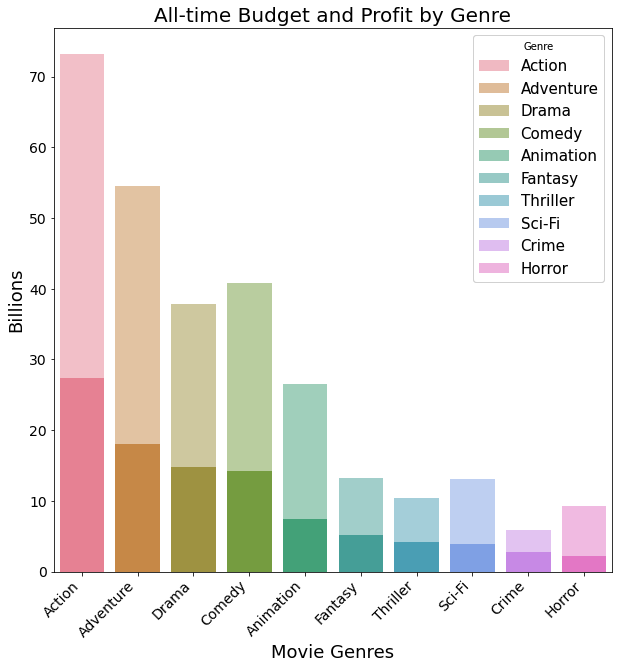

In [87]:
plt_tmdb = plot_budgets_profits_top10(tmdb_clean_df)
plt_tmdb.savefig(os.path.join(path_dir_results, 'TMDB_All_time_Budget_Gross_plot.jpg'))

### 3.3.9. Combine two dataframes for budget analysis.

Looks like the two frames compliment eachother and our analysis would benefit from joining them.
Here's how we're going to join them:

* We'll add the nominated/awarded columns for `imdb_budgets_df`.
* We'll create a slice of `imdb_df` containing all movies released after 2016.
* We'll concatenate the slice with the `tmdb_clean_df`.

In [88]:
imdb_budget_df.head()

,month,closest_match,net_profit_usd_mil,budget_usd_mil,gross_usd_mil,roi_pct,movie_id,title,year,avg_rating,total_votes,duration_min,cast_names,producers,writers,directors,genre1,genre2,title_preprocessed
0,5,pirates of the caribbean on stranger tides,635.063875,410.6,1045.663875,154.667286,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011,6.6,447624,136.0,"Johnny Depp, Geoffrey Rush, Penélope Cruz, Ian...",NaN,"Stuart Beattie, Ted Elliott, Tim Powers, Terry...",Rob Marshall,Action,Adventure,pirates of the caribbean on stranger tides
1,6,dark phoenix,-200.237650,350.0,149.762350,-57.210757,tt6565702,Dark Phoenix,2019,6.0,24451,113.0,"Nicholas Hoult, James McAvoy, Michael Fassbend...",NaN,"John Byrne, Jack Kirby, Stan Lee, Chris Clarem...",Simon Kinberg,Action,Adventure,dark phoenix
2,5,avengers age of ultron,1072.413963,330.6,1403.013963,324.384139,tt2395427,Avengers: Age of Ultron,2015,7.3,665594,141.0,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",Kevin Feige,"Jack Kirby, Stan Lee, Joe Simon, Jim Starlin",Joss Whedon,Action,Adventure,avengers age of ultron
3,12,star wars the last jedi,999.721747,317.0,1316.721747,315.369636,tt2527336,Star Wars: The Last Jedi,2017,7.1,462903,152.0,"Carrie Fisher, Mark Hamill, John Boyega, Daisy...","Kathleen Kennedy, Ram Bergman",George Lucas,Rian Johnson,Action,Adventure,star wars the last jedi
4,12,star wars episode vii the force awakens,1747.311220,306.0,2053.311220,571.016739,tt2488496,Star Wars: Episode VII - The Force Awakens,2015,8.0,784780,136.0,"Oscar Isaac, Domhnall Gleeson, John Boyega, Da...","Kathleen Kennedy, Bryan Burk","George Lucas, Lawrence Kasdan, Michael Arndt",J.J. Abrams,Action,Adventure,star wars episode vii the force awakens


### Adding columns for awarded and nominated cast and crew members to `imdb_budgets_df`.

In [89]:
# Apply the function to the cast, crew and create a new column indicating whether any cast/crew was nominated/awarded
imdb_budget_df['cast_nominated'] = \
imdb_budget_df['cast_names'].apply(check_nominated_characters, args=(all_nominated_set,))
imdb_budget_df['cast_awarded'] = \
imdb_budget_df['cast_names'].apply(check_nominated_characters, args=(all_nominated_set,))
# Check if crew members were nominated or awarded
imdb_budget_df['producer_nominated'] = \
imdb_budget_df['producers'].apply(check_nominated_characters, args=(all_nominated_set,))
imdb_budget_df['director_nominated'] = \
imdb_budget_df['directors'].apply(check_nominated_characters, args=(all_nominated_set,))
imdb_budget_df['screenplay_nominated'] = \
imdb_budget_df['writers'].apply(check_nominated_characters, args=(all_nominated_set,))

# Check if each cast member was awarded
imdb_budget_df['producer_awarded'] = \
imdb_budget_df['producers'].apply(check_nominated_characters, args=(all_winners_set,))
imdb_budget_df['director_awarded'] = \
imdb_budget_df['directors'].apply(check_nominated_characters, args=(all_winners_set,))
imdb_budget_df['screenplay_awarded'] = \
imdb_budget_df['writers'].apply(check_nominated_characters, args=(all_winners_set,))

# add total nominations
imdb_budget_df['total_nominations'] = imdb_budget_df['cast_nominated'] + \
    imdb_budget_df['producer_nominated'] + \
    imdb_budget_df['director_nominated'] + \
    imdb_budget_df['screenplay_nominated']

# add total awards
imdb_budget_df['total_awards'] = imdb_budget_df['cast_awarded'] + \
                                     imdb_budget_df['producer_awarded'] + \
                                     imdb_budget_df['director_awarded'] + \
                                     imdb_budget_df['screenplay_awarded']
# add total awards
imdb_budget_df['crew_awards'] = imdb_budget_df['producer_awarded'] + \
                                     imdb_budget_df['director_awarded'] + \
                                     imdb_budget_df['screenplay_awarded']

#### Rename columns to match the `tmdb_clean_df` schema. 

In [90]:
imdb_budget_df.rename(columns={'duration_min':'runtime',\
                        'producers':'producer', \
                        'writers':'screenplay',\
                        'directors':'director'}, inplace=True)

#### Selecting a subset of columns to use from both dataframes and concatenating.

In [91]:
imdb_slice_df = imdb_budget_df[imdb_budget_df['year']>2016]

cols_to_use = ['genre1', 'genre2', 'year','month', 'runtime', \
                     'budget_usd_mil', 'gross_usd_mil', 'net_profit_usd_mil', \
                     'roi_pct', 'producer', 'screenplay', 'director', 'cast_names', \
              'total_nominations', 'total_awards', \
               'cast_awarded', 'crew_awards']
tmdb_slice_df = tmdb_clean_df[cols_to_use].copy() 

imdb_slice_df = imdb_slice_df[cols_to_use].copy()

In [92]:
movie_df = pd.concat([imdb_slice_df, tmdb_slice_df])
movie_df.shape

(2715, 17)

# 4. Exploratory Analysis.

Here we'll explore the relationship between movie's ratings, budget, gross, profit and genres.
Historic trends:

* Movie budgets and profits, what are the historic trends?
* What are the most expensive and profitable genres?
* What are average budgets, profits for each genre? 
* What are the highest-rated genres?

#### Plotting historic budget and gross for combined dataframe.

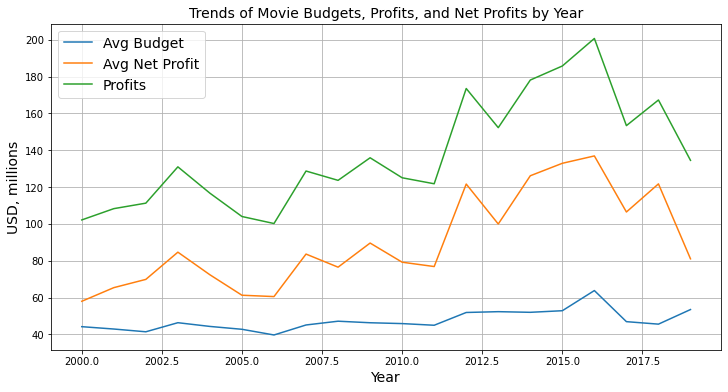

In [93]:
#historic trend
plt_movies = plot_historic_trend(movie_df)
plt_movies.savefig(os.path.join(path_dir_results, 'CLEAN_All_time_Budget_Gross_plot.jpg'))

#### Plotting top-10 all-time highest profit genres.

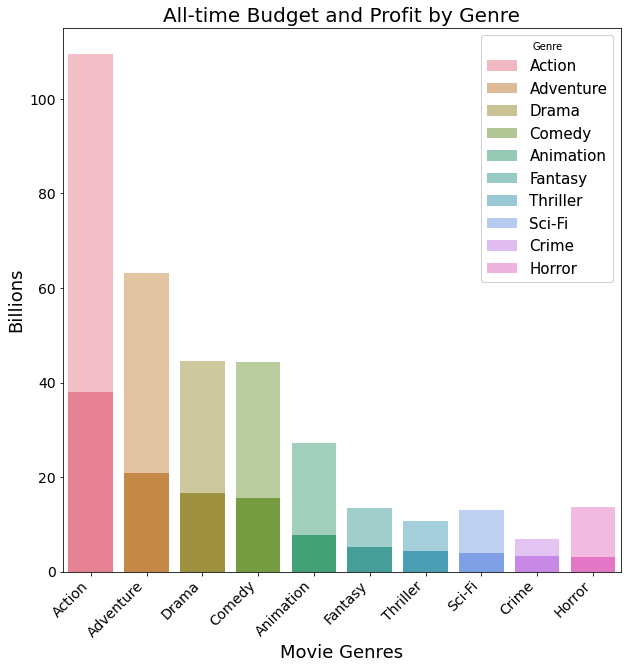

In [94]:
plt_movies= plot_budgets_profits_top10(movie_df)
plt_movies.savefig(os.path.join(path_dir_results, "CLEAN_All_time_Budget_Gross_plot.jpg"));

### Selecting top-10 most profitable genres.

We'll define top 10 most net-profitable genres and look how budgets and profits are distributed.

In [95]:
# Most profitable genres
top_movies_represented = movie_df.groupby('genre1').agg({'gross_usd_mil': 'sum'}).reset_index()
top10_genres = top_movies_represented.sort_values(by='gross_usd_mil', ascending=False)['genre1'].head(10)
top10_genres = top10_genres.to_list()
top10_genres

['Action',
 'Adventure',
 'Drama',
 'Comedy',
 'Animation',
 'Horror',
 'Fantasy',
 'Sci-Fi',
 'Thriller',
 'Family']

#### Using boxplots to display genre budgets and profits.

First, we'll filter out genres that are not in `top10_genres`.

In [96]:
# filter the movie_df to include only the top 10 genres
top10_genres_df = movie_df[movie_df['genre1'].isin(top10_genres)]

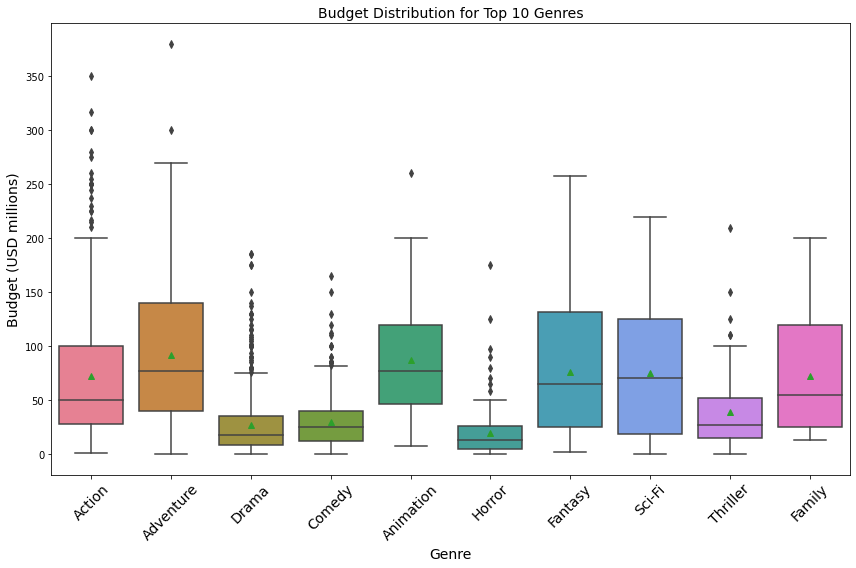

In [97]:
# plot the budgets
plt.figure(figsize=(12, 8))
sns.boxplot(x='genre1', y='budget_usd_mil', \
            data=top10_genres_df, palette='husl', order=top10_genres, showmeans=True)
plt.ylabel('Budget (USD millions)', fontsize=14)
plt.xlabel('Genre', fontsize=14)
plt.title('Budget Distribution for Top 10 Genres', fontsize=14)
plt.xticks(rotation=45, fontsize=14)  # Rotate x-axis labels for better readability

plt.tight_layout()

# save plot
plt.savefig(os.path.join(path_dir_results, 'CLEAN_top10_Budgets_plot.png'))
plt.show()

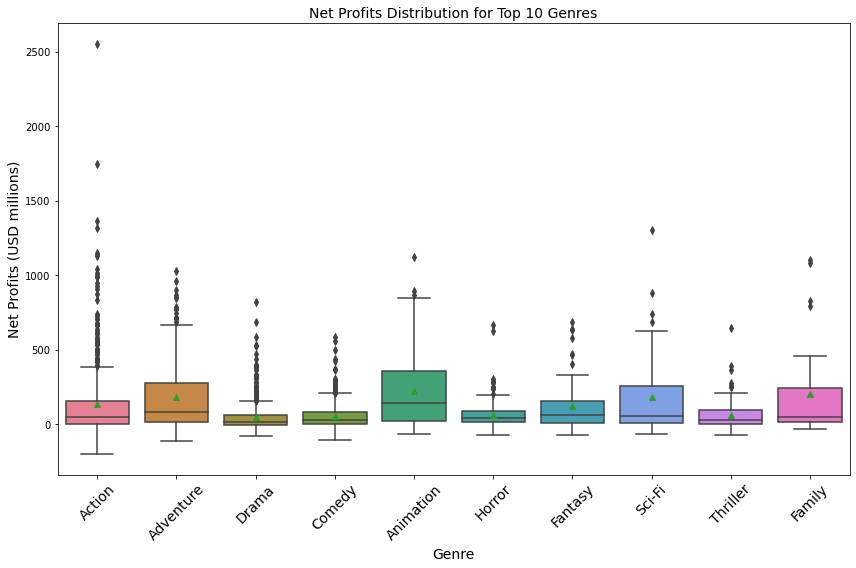

In [98]:
# plot the net profits
plt.figure(figsize=(12, 8))
sns.boxplot(x='genre1', y='net_profit_usd_mil', \
            data=top10_genres_df, palette='husl', order=top10_genres, showmeans=True)
plt.ylabel('Net Profits (USD millions)', fontsize=14)
plt.xlabel('Genre', fontsize=14)
plt.title('Net Profits Distribution for Top 10 Genres', fontsize=14)
plt.xticks(rotation=45, fontsize=14)  # Rotate x-axis labels for better readability

plt.tight_layout()

# save plot
plt.savefig(os.path.join(path_dir_results, 'CLEAN_top10_NetProfits_plot.png'))
plt.show()

## 4.1. Genre Budgets and Profits Analysis.

### Defining supplemental plotting functions.

* `display_genre_budget_hist` will plot the histogram of budgets for `genre`, label and save the plot. 
* `display_genre_roi_hist` will plot the histogram of ROI for `genre`, label and save the plot.  
* `display_genre_ols` will scatter-plot movie budgets vs movie gross profits. Tis function will fit a linear regression model for the data and return the slope coefficient.
* `display_success_genre` (not used) was designed to display the probability of a successfull movie by budget, but it won't work well with small datasets. We won't be using it in the analysis.   
* `display_genre_release_month` will plot gross profits and budgets by month for `genre`, label and save the plot. Function will return 3 most profitable release months as a string.
* `display_genre_duration` will plot gross profits and budgets by duration for `genre`, label and save the plot. Function will return 3 most profitable runtimes as a string.
* `display_genre_content_rating` will plot gross profits and budgets by content rating for `genre`, label and save the plot. Function will return the most profitable content rating as a string.
* `display_top_cast_or_crew_with_awards` will plot cast or crew with highest gross profits for `genre`, label and save the plot. Function will return the list of cast or crew, indicating those who are critically acclaimed.
* `plot_genre_subgenre_bar` will plot highest gross profits for `genre2` (subgenre), label and save the plot. Function will return the list of most profitable sub-genres.


#### `display_genre_budget_hist`

In [99]:
# Displaying histogram of genre budget
# INPUT
# df_genre: dataframe with 'budget_usd_mil' column
# genre: categorical value 
# color: colormap for plotting 
# path_dir_results: where to save the plot
def display_genre_budget_hist(df_genre, genre, color, path_dir_results):
    
    plt.figure(figsize=(8, 6))
    # plot histogram for budget
    sns.histplot(df_genre['budget_usd_mil'], kde=False, bins=100, color=color)
    
    # set labels and title
    plt.xlabel('Budget (USD Millions)', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title(f'Histogram of {genre} Budget', fontsize=18)
    
    plt.savefig(os.path.join(path_dir_results, f'{genre}_budget.png'))
    plt.tight_layout()
    #plt.show()

#### display_genre_roi_hist

In [100]:
#Displaying genre ROI histogram
# INPUT
# df_genre: dataframe with 'budget_usd_mil' column
# genre: categorical value 
# color: colormap for plotting 
# path_dir_results: where to save the plot
def display_genre_roi_hist(df_genre, genre, color, path_dir_results):
    plt.figure(figsize=(8, 6))
    
    # def ROI values under 50%
    roi_under_50 = (df_genre['roi_pct'] < 50).sum()
    ntotal = df_genre.shape[0]
    
    # plot histogram for ROI
    sns.histplot(df_genre['roi_pct'], kde=False, bins=100, color=color)
    
    # add a vertical line at ROI = 50
    plt.axvline(x=50, color='red', linestyle='--')
    
    # add text with ROI statistics
    plt.text(0.35, 0.95, f"ROI < 50%: {roi_under_50}\nTotal: {ntotal}",
             transform=plt.gca().transAxes, fontsize=14, verticalalignment='top')
    
    plt.xlabel('ROI, %', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title(f'Histogram of {genre} ROI', fontsize=18)
    
    plt.tight_layout()
    plt.savefig(os.path.join(path_dir_results, f'{genre}_ROI.png'))
    #plt.show()

#### `display_genre_ols`

We'll import the `statsmodels` package for linear regression.

In [101]:
# Displaying genre's OLS Model

# INPUT
# df_genre: dataframe with 'budget_usd_mil' and ''gross_usd_mil columns
# genre: categorical value 
# color: colormap for plotting 
# path_dir_results: where to save the plot

#OUTPUT
# model's slope coefficient


import statsmodels.api as sm

def display_genre_ols(df_genre, genre, color, path_dir_results):
    plt.figure(figsize=(8, 6))
    
    # add constant term for the intercept
    X = sm.add_constant(df_genre['budget_usd_mil'])
    y = df_genre['gross_usd_mil']
    
    # fit a linear regression model
    model = sm.OLS(y, X)
    results = model.fit()
        
    # create the scatter plot for the current genre with the assigned color
    sns.scatterplot(data=df_genre, x='budget_usd_mil', y='gross_usd_mil', alpha=0.7, color=color)

    # add the regression line for the current genre
    plt.plot(df_genre['budget_usd_mil'], results.predict(X), color='black')
    
    # add model parameters and p-values as text
    ints = results.params['const']
    slp = results.params['budget_usd_mil']
    pval = results.pvalues['budget_usd_mil']
    plt.text(0.05, 0.95, \
             f'Intercept: {ints:.2f}\n Slope: {slp:.2f}  \nP-value: {pval:.3f}',
             transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
    # set title and labels
    plt.title(f'Movie Budget vs. Gross Profit for Genre: {genre}', fontsize=14)
    plt.xlabel('Budget (USD millions)', fontsize=14)
    plt.ylabel('Gross Profit (USD millions)', fontsize=14)
    plt.grid(True)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.tight_layout()
    
    # save and display the plot
    plt.savefig(os.path.join(path_dir_results, f'{genre}_expected_profits_plot.png'))
    #plt.show()
    return slp

#### `display_success_genre` (not used)
This function will plot the probability distribution of a movie being successfull in box office (ROI > 50%) by the budget.
For a given genre dataframe, it's going to re-bin movie budgets and compute the % of successes for each budget bin, then plot the results. It works well for well-represented genres but won't execute if genres have too few datapoints.


In [102]:
# genre success stats  (not in use)
# INPUT
# df_genre: dataframe with 'budget_usd_mil' and roi_pct columns
# genre: categorical value 
# color: colormap for plotting 
# path_dir_results: where to save the plot

def display_success_genre(df_genre, genre, color):
    # define successfull movies as movies ith ROI > 50%
    df_genre.loc[:, 'success_status'] = df_genre.loc[:, 'roi_pct'] > 50
    # min, max, count of available budgets for genre
    min_budget =  genre_df['budget_usd_mil'].min()
    max_budget = genre_df['budget_usd_mil'].max()
    total_count = len(genre_df['budget_usd_mil'])
    
    step = 0.5;
    # try-catch for genres with too few datapoints
    try:
        spacing = int((max_budget - min_budget)/step)
        bins_genre = np.linspace(min_budget, max_budget, min(spacing, total_count))
        success_ratio = genre_df.groupby(pd.cut(genre_df['budget_usd_mil'], bins=bins_genre))['success_status'].mean()
        # remove NaN values from success_ratio
        success_ratio_cleaned = success_ratio.dropna()
        bins = bins_genre[:-1]
        bins_matched = bins[~success_ratio.isna()]
        if len(success_ratio_cleaned >0):
            # create a line plot of budget bins vs. success ratio
            sns.lineplot(x=bins_matched, y=success_ratio_cleaned, marker='o', color = color)
            plt.axhline(y=0.5, color='red', linestyle='--')
    
            #  labels and title
            plt.xlabel('Budget (USD millions)')
            plt.ylabel('Success Ratio')
            plt.title(f'Success Ratio by Budget of {genre} %')

    except ValueError as e:
        # handle the ValueError caused by NaN values in bins_genre
        print("ValueError:", e, genre, total_count)
        print("NaN values are present")
  
    # Show the plot
    #plt.show()
    plt.savefig(os.path.join(path_dir_results, f'{genre}_histogram_of_success_ROI.png'))

#### `display_genre_release_month`
We'll import `calendar` module to convert numeric month number to name.  

In [103]:
import calendar

# function will plot avg budget and revenue vs release month
# INPUT
# df_genre: dataframe with 'budget_usd_mil' and roi_pct columns
# genre: categorical value 
# color: colormap for plotting 
# path_dir_results: where to save the plot

# OUTPUT: month_str, most profitable release months

def display_genre_release_month(df_genre, genre, color, path_dir_results):
    # Plot data
    plt.figure(figsize=(10, 6))
    df_genre = df_genre.groupby(['genre1', \
                                 'month']).agg({'gross_usd_mil': 'mean', \
                                                'budget_usd_mil': 'mean'}).reset_index()

    df_genre['month_str'] = df_genre['month'].apply(lambda x: calendar.month_name[x])
    
    sns.barplot(data=df_genre, x='month_str', y='budget_usd_mil', label='Budget', color=color)
    sns.barplot(data=df_genre, x='month_str', y='gross_usd_mil', label='Revenue', color=color, alpha=0.5)

    # Set title and labels
    plt.title(f'Profits and Release Time for {genre}', fontsize=20)
    plt.xlabel('Month', fontsize=18)
    plt.ylabel('USD, millions', fontsize=18)
    plt.yticks(fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=14)

    plt.legend()
    
    # Save and show the plot
    plt.tight_layout()
    plt.savefig(os.path.join(path_dir_results, f'{genre}_release_month.png')) 
    top_3_profitable_months = df_genre.nlargest(3, 'gross_usd_mil')[['month_str', 'gross_usd_mil']]
    #plt.show()
    list_month = top_3_profitable_months['month_str'].values
    month_str = ', '.join(list_month)
    return month_str

#### `display_genre_duration`

In [104]:
# function will plot duration vs revenue
# INPUT
# df_genre: dataframe with 'budget_usd_mil' and 'runtime' columns
# genre: categorical value 
# color: colormap for plotting 
# path_dir_results: where to save the plot

# OUTPUT: runtime_str , best categorical runtme. 

def display_genre_duration(df_genre, genre, color, path_dir_results):
    # Plot data
    plt.figure(figsize=(10, 6))
    
    # define the bins for categorizing runtimes
    bins = [0, 80, 100, 120, 140, 160, 180, 200, 240]
    
    # define labels for each category
    labels = ['<80', '80-100', '101-120', '121-140', '141-160', '161-180', '181-200', '>200']
    
    # use pd.cut() to categorize runtimes into bins
    df_genre = df_genre.copy()
    df_genre['runtime_category'] = pd.cut(df_genre['runtime'], bins=bins, labels=labels, right=False)

    df_genre = df_genre.groupby(['genre1', 'runtime_category']).agg({'gross_usd_mil': 'mean', 'budget_usd_mil': 'mean'}).reset_index()
    
    sns.barplot(data=df_genre, x='runtime_category', y='budget_usd_mil', label='Budget', color=color)
    sns.barplot(data=df_genre, x='runtime_category', y='gross_usd_mil', label='Revenue', color=color, alpha=0.5)

    # Set title and labels
    plt.title(f'Profits by Runtime for {genre}', fontsize=20)
    plt.xlabel('Duration, min', fontsize=18)
    plt.ylabel('USD, millions', fontsize=18)
    plt.yticks(fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=14)

    plt.legend()
    
    # Save and show the plot
    plt.tight_layout()
    plt.savefig(os.path.join(path_dir_results, f'{genre}_runtime.png'))   
    #plt.show()
    top_3_profitable_time = df_genre.nlargest(3, 'gross_usd_mil')[['runtime_category', 'gross_usd_mil']]
    list_runtime = top_3_profitable_time['runtime_category'].values
    runtime_str = ', '.join(list_runtime)
    return runtime_str 

#### `display_genre_content_rating`

In [105]:
# function will display content rating vs avg movie profits 
# INPUT
# df_genre: dataframe with 'budget_usd_mil', gross_usd_mil, content_rating columns
# genre: categorical value 
# color: colormap for plotting 
# path_dir_results: where to save the plot
def display_genre_content_rating(df_genre, genre, color, path_dir_results):
    # try/catch for genres with no rating info
    try:
        plt.figure(figsize=(10, 6))
        # group together by genre and content rating
        df_genre = df_genre.groupby(['genre1', \
                                     'content_rating']).agg({'gross_usd_mil': 'mean', \
                                                             'budget_usd_mil': 'mean'}).reset_index()
    
        sns.barplot(data=df_genre, x='content_rating', y='budget_usd_mil', label='Budget', color=color)
        sns.barplot(data=df_genre, x='content_rating', y='gross_usd_mil', label='Revenue', color=color, alpha=0.5)
       
        # set title and labels
        plt.title(f'Profits by Content Rating for {genre}', fontsize=20)
        plt.xlabel('Content Rating', fontsize=18)
        plt.ylabel('USD, millions', fontsize=18)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
    
        plt.legend()

        plt.tight_layout()
    
        plt.savefig(os.path.join(path_dir_results, f'{genre}_content_rating.png'))
        #plt.show()
        
        #return top content rating
        top_content_rating = df_genre.loc[df_genre['gross_usd_mil'].idxmax(), 'content_rating']
        return top_content_rating
    except ValueError as e:
        # handle the ValueError caused by low number of datapoints for content rating
        print("ValueError:", e, genre)

#### `display_top_cast_or_crew_with_awards`

In [106]:
# cast or crew for top 10 most profitable movies in genre with awards 

# INPUT
# df_genre: dataframe with 'budget_usd_mil' and roi_pct columns
# genre: categorical value 
# color: colormap for plotting 
# cast_or_crew: category, can be cast, director, producer, screenplay.
# awards_list: checks names against the list and adds * if names in the list
# path_dir_results: where to save the plot

# OUTPUT
# cast_str : list of cast names

def display_top_cast_or_crew_with_awards(genre_df, genre, cast_or_crew, awards_list, color, path_dir_results):
    
    genre_df_slice = genre_df[[cast_or_crew, 'net_profit_usd_mil']]
    # split the 'producer' column by comma and expand it into separate rows
    cast_or_crew_df = \
    genre_df_slice[cast_or_crew].str.split(',', \
                                           expand=True).stack().reset_index(level=1, \
                                                                            drop=True).rename(cast_or_crew)

    # merge the cast or crew names back to the original df
    df_expanded = genre_df_slice.drop(cast_or_crew, \
                                      axis=1).merge(cast_or_crew_df, left_index=True, right_index=True)
    
    
    # group by cast or crew member and calculate total net profit
    cast_or_crew_profit = df_expanded.groupby(cast_or_crew)['net_profit_usd_mil'].sum()
    # convert Series to DataFrame
    cast_or_crew_profit = cast_or_crew_profit.to_frame().reset_index()

    # set 'cast_or_crew' column as index
    cast_or_crew_profit.set_index(cast_or_crew, inplace=True)
    # eeset the index
    cast_or_crew_profit.reset_index(inplace=True)    
    
    # top 10 cast or crew members with the highest total net profit
    top_10_cast_or_crew = cast_or_crew_profit.nlargest(10, 'net_profit_usd_mil')
        
   # Check if each member of the top 10 cast or crew has won any awards, add *
    top_10_cast_or_crew[cast_or_crew] = \
    top_10_cast_or_crew[cast_or_crew].apply(lambda name: f"*{name}" if name in awards_list else name)

    # Plot the bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(data=top_10_cast_or_crew, x=cast_or_crew, y='net_profit_usd_mil', palette='viridis')

    plt.title(f'Top 10 Most Successful {cast_or_crew.capitalize()} by Total Net Profit', fontsize =16)
    plt.xlabel(f'{cast_or_crew.capitalize()}', fontsize =16)
    plt.ylabel('Total Profit, USD millions', fontsize =16)
    plt.xticks(rotation=45, ha='right', fontsize =14)
    plt.tight_layout()
    plt.savefig(os.path.join(path_dir_results, f'{genre}_top_10_{cast_or_crew.capitalize()}.png'))    
    #plt.show()
    list_cast = top_10_cast_or_crew[cast_or_crew].values
    cast_str = ', '.join(list_cast)
    return cast_str

#### `plot_genre_subgenre_bar`

In [107]:
# plot top profitable 5 subgenres for each genre
# INPUT
# df_genre: dataframe with 'budget_usd_mil' and roi_pct columns
# genre: categorical value 
# color: colormap for plotting 
# path_dir_results: where to save the plot

# OUTPUT: 
# genre_str most profitable subgenres.

def plot_genre_subgenre_bar(df_genre, genre, color, path_dir_results):
    # filter the grouped df based on genre2
    
    # create aggregated df for plotting using avg net profits 
    df_genre = df_genre.groupby(['genre2']).agg({'gross_usd_mil': 'mean', \
                                                 'budget_usd_mil':'mean'}).reset_index()
    plot_data = df_genre.nlargest(5, 'gross_usd_mil')
    
    # plotting
    plt.figure(figsize=(14, 8))

    # plot bars for 'budget_usd_mil' as stacked bars
    sns.barplot(data=plot_data, x='genre2', y='gross_usd_mil', \
                label='Revenue', color=color, alpha=0.5)
    sns.barplot(data=plot_data, x='genre2', y='budget_usd_mil', color=color, \
                label='Budget (USD Millions)')

    # set labels and title
    plt.xlabel('Sub-Genre', fontsize=16)
    plt.ylabel('Movie Profit (USD million)', fontsize=16)
    plt.title(f'Most profitable sub-genres for {genre}', fontsize=18)

    plt.xticks(rotation=45, ha='right',fontsize=16)
    # set legend, layout
    plt.legend(fontsize=16)
    plt.tight_layout()

    # save the plot
    plt.savefig(os.path.join(path_dir_results, f'{genre}_subgenre.png'))
    genre_cast = plot_data['genre2'].unique()
    genre_str = ', '.join(genre_cast)

    return genre_str 
    #plt.show()

## 4.2. Genre Budgets and Profits Analysis: Generating Plots for `Action` genre.

In this block we'll walk you through genreating analysis plots for `Action` genre.
We'll  select a subsets of movies where primary genre is `Action` and use it as input argument to our plotting functions.

In [108]:
# Define subsets of movies where primary genre is `Action`.
analysis_genres = ['Action']
palette = sns.color_palette("husl", n_colors=len(analysis_genres))
grouped_df = movie_df[movie_df['genre1'].isin(analysis_genres)]
grouped_content_df = content_rating_clean_df[content_rating_clean_df['genre1'].isin(analysis_genres)]

### 4.2.1. Budget, ROI.

#### Action's historic trends.

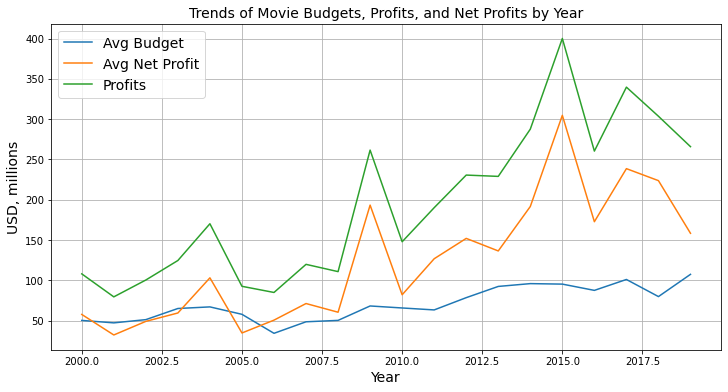

In [109]:
genre_df = grouped_df[grouped_df['genre1'] == 'Action']
plt_action = plot_historic_trend(genre_df);
plt_action.savefig(os.path.join(path_dir_results, "Action_Historic_Budget_Profits_plot.jpg"));

#### `Action` historic trends conclusion:
Since year 2000,  average `Action` budget increased by 100% (2x). `Action` profits increased by what looks like 4x. In some years (2010, 2016) `Action` movies performed worse.

#### Budget, ROI.

We'll display Action budgets, Net Profits and ROIs. 

#### Action Budgets Boxplot
Plotting budget distributions as a boxplot.

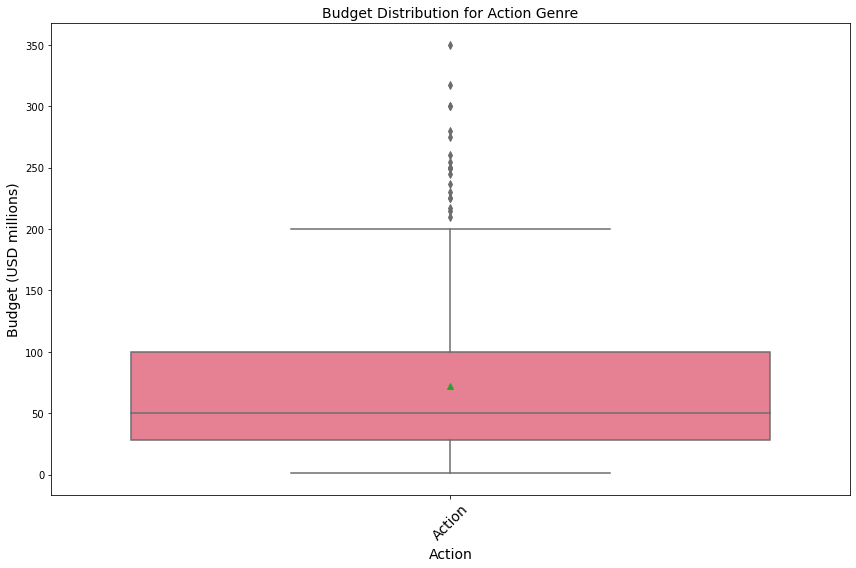

In [127]:
# plot the budgets
plt.figure(figsize=(12, 8))
sns.boxplot(x='genre1', y='budget_usd_mil', \
            data=genre_df, color = palette[0], showmeans=True)
plt.ylabel('Budget (USD millions)', fontsize=14)
plt.xlabel('Action', fontsize=14)
plt.title('Budget Distribution for Action Genre', fontsize=14)
plt.xticks(rotation=45, fontsize=14)  # Rotate x-axis labels for better readability

plt.tight_layout()

# save plot
plt.savefig(os.path.join(path_dir_results, 'CLEAN_Action_Budget_Box_plot.png'))
plt.show()

#### Action Histogram of Budgets.

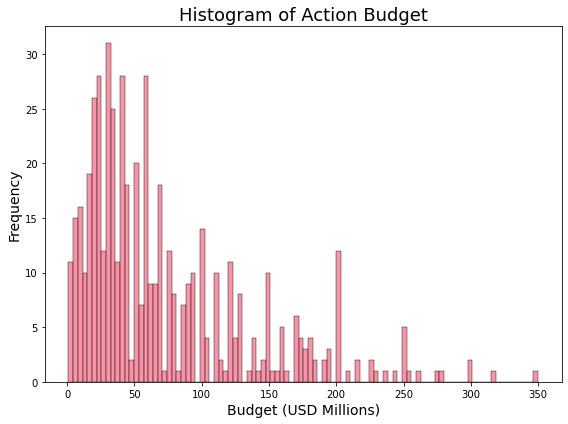

In [124]:
#budget historic, success, roi, disribution
display_genre_budget_hist(genre_df, 'Action', palette[0], path_dir_results)

#### Action Net Profits Boxplot
PLotting Net Profits as a boxplot.

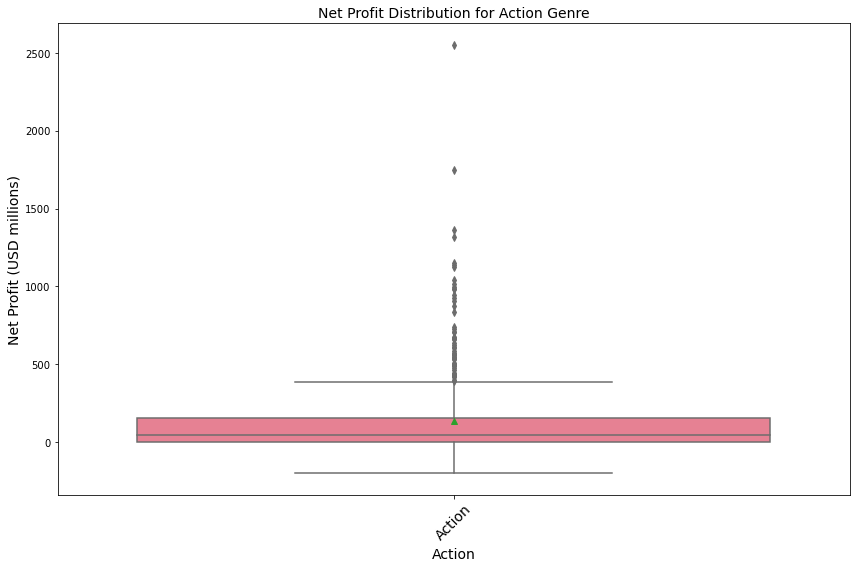

In [126]:
# plot the net profit
plt.figure(figsize=(12, 8))
sns.boxplot(x='genre1', y='net_profit_usd_mil', \
            data=genre_df, color = palette[0], showmeans=True)
plt.ylabel('Net Profit (USD millions)', fontsize=14)
plt.xlabel('Action', fontsize=14)
plt.title('Net Profit Distribution for Action Genre', fontsize=14)
plt.xticks(rotation=45, fontsize=14)  # Rotate x-axis labels for better readability

plt.tight_layout()

# save plot
plt.savefig(os.path.join(path_dir_results, 'CLEAN_Action_Profit_Box_plot.png'))
plt.show()

#### Action Histogram of ROIs and baseline return.

3.62525708491943


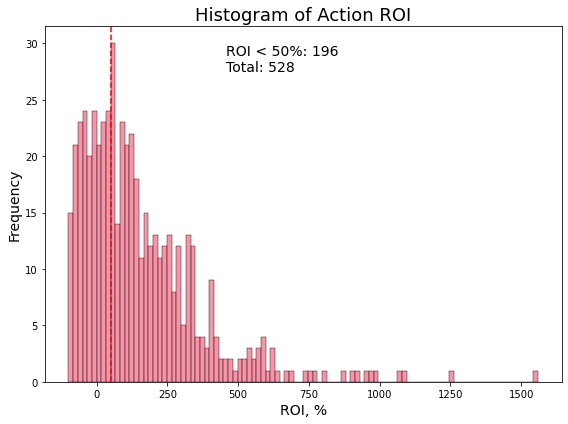

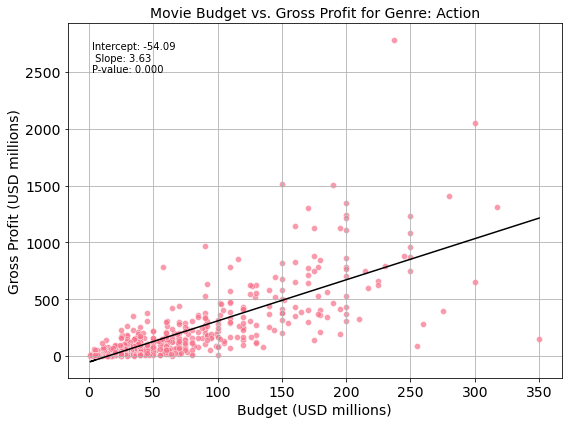

In [123]:
display_genre_roi_hist(genre_df, 'Action', palette[0], path_dir_results)
expected_ret = display_genre_ols(genre_df, 'Action', palette[0], path_dir_results)
print(expected_ret)

#### `Action`  budget and profit conclusion:
The majority of `Action` movies cost between 25 and 100 million dollars. Almost 37% of movies had ROI of 50% or less. Modelled expected return per 1 million of budget is 3.6 million of profit.

By the scatterplot distribution, we can say that `Action` is relatively high risk genre.
Significant number of points are under the fit line and the lower the budget, the more points fall under.


## 4.2.2. Action key metrics: release month, duration, content ratng.

### Next, we're going to plot profit distributions by release month, duration time and content rating.

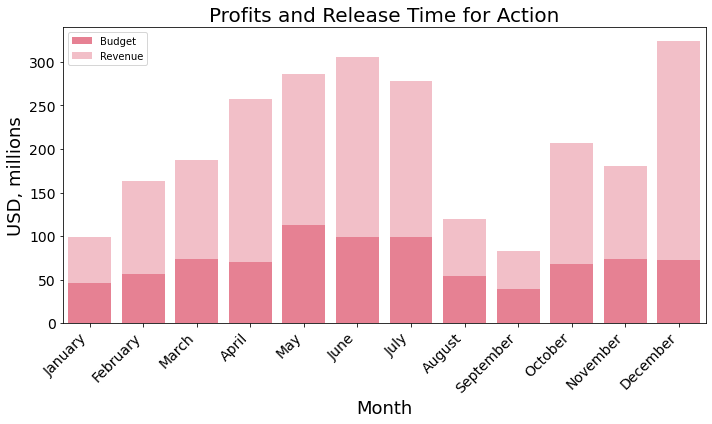

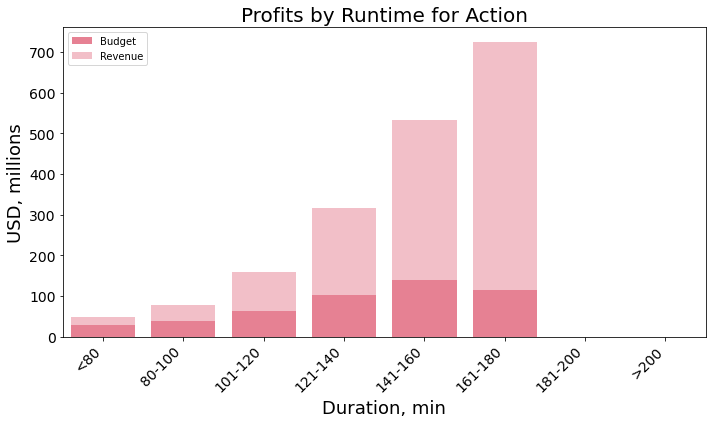

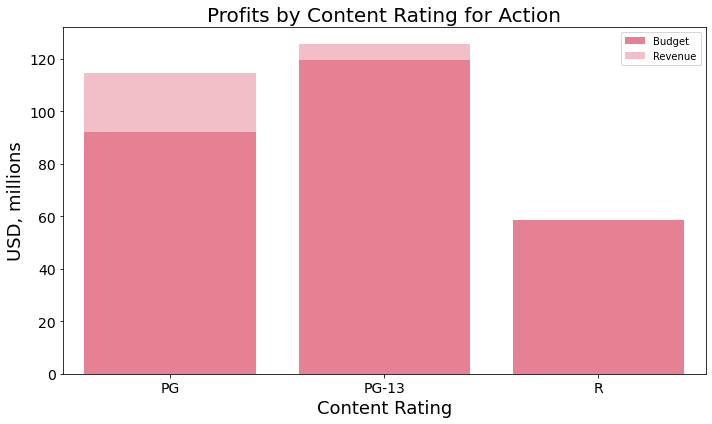

In [111]:
#release month
preffered_month = display_genre_release_month(genre_df, 'Action', palette[0], path_dir_results)
#duration 
aa = preffered_duration = display_genre_duration(genre_df, 'Action', palette[0], path_dir_results)
#content rating
genre_content_df = grouped_content_df[grouped_content_df['genre1'] == 'Action']
preffered_content = display_genre_content_rating(genre_content_df, 'Action', palette[0], path_dir_results)

#### `Action` release time, duration, content rating conclusions:

Looks like early summer and holiday season are the best time to release a new action movie.
Action movies with longer duration do better in box office, and for content rating, teenage-friendly (PG-13) is the best option.

#### `Action`  most profitable subgenres.

We'll look into profit distributions beween `Action` subgenres defined by (`genre2`) in the table.

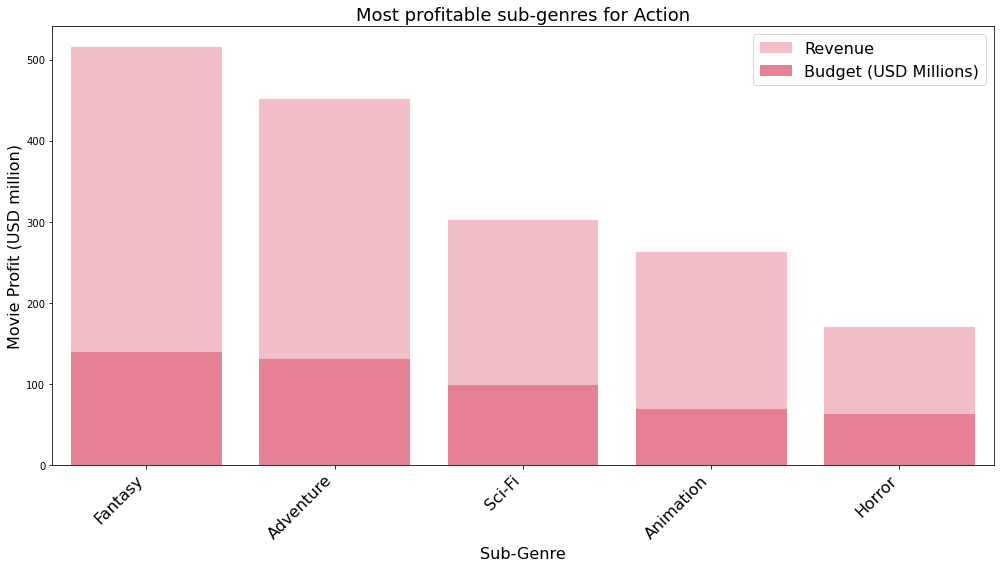

In [112]:
#subgenre
preffered_subgenre = plot_genre_subgenre_bar(genre_df, 'Action', palette[0], path_dir_results)

#### `Action` subgenre conclusions:
Fantasy and Adventure are the best performing subgenres.

## 4.2.3 Key metrics: Cast and Crew, Having Critically Acclaimed Crew or Cast.
In this final section, we'll look at the most profitable cast and crew members, as well as check if having a critically acclaimed cast or crew would increase the movie ROI.

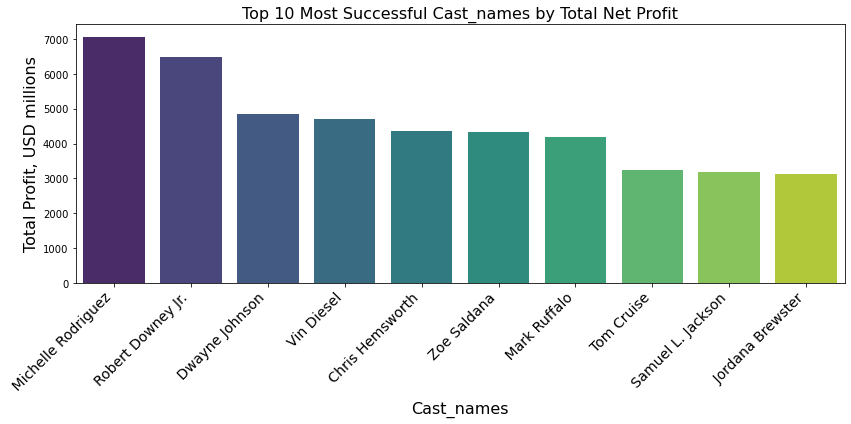

In [113]:
display_top_cast_or_crew_with_awards(genre_df, \
                                     'Action', 'cast_names', all_winners_set, palette[0], path_dir_results);

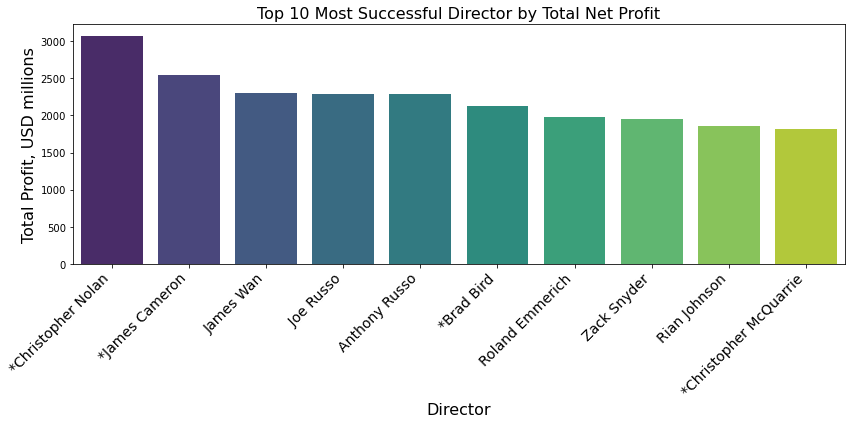

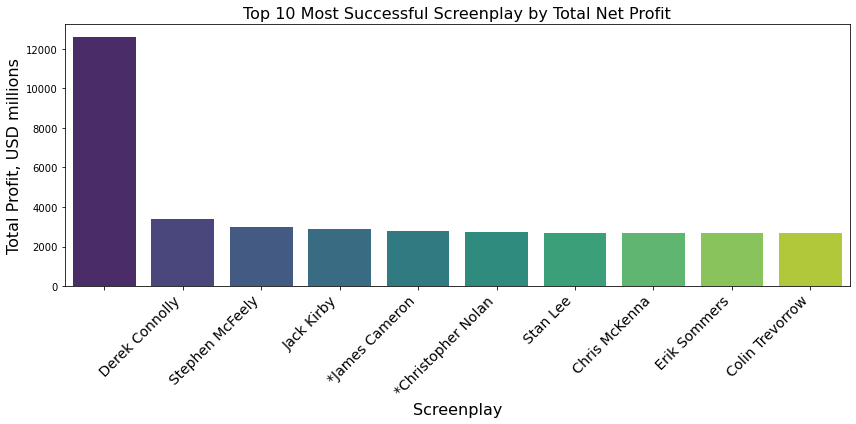

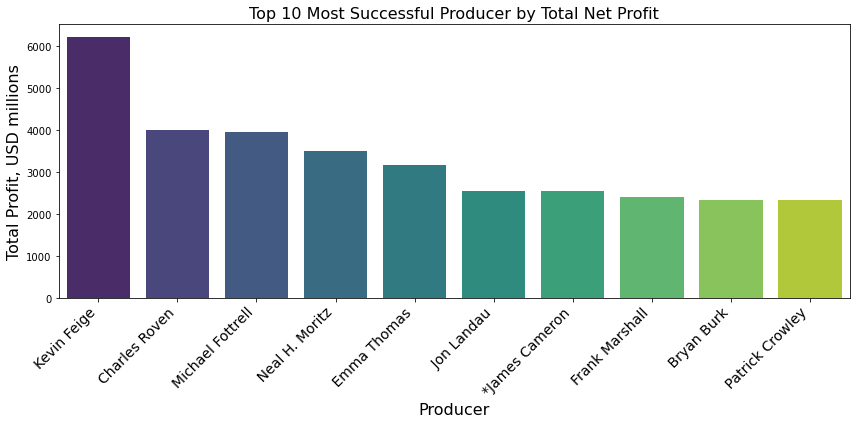

In [114]:
#crew
display_top_cast_or_crew_with_awards(genre_df, \
                                     'Action', 'director', all_winners_set, palette[0], path_dir_results);
display_top_cast_or_crew_with_awards(genre_df, \
                                     'Action', 'screenplay', all_winners_set, palette[0], path_dir_results);
display_top_cast_or_crew_with_awards(genre_df, \
                                     'Action', 'producer', all_winners_set, palette[0], path_dir_results);

#### Estimated returns with or without critically acclaimed cast/crew.

We'll create two subsets of movies: one with cast critically acclaimed, the other is with crew critically acclaimed.
We'll run both sets through our linear regression plotting function `display_genre_ols` and compare the slopes (return coefficient).

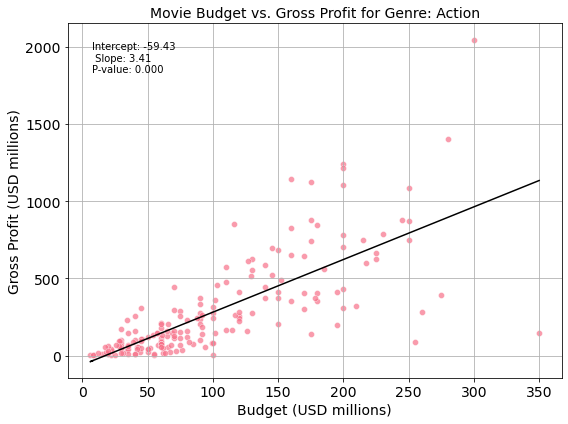

In [115]:
#OLD with/without awards
genre_df_cast_awarded = genre_df[(genre_df['cast_awarded']>1)]
expected_ret_awards = display_genre_ols(genre_df_cast_awarded, 'Action', palette[0], path_dir_results)
plt.gcf().savefig(os.path.join(path_dir_results, 'Action_Cast_Awarded_Action_plot.png'));

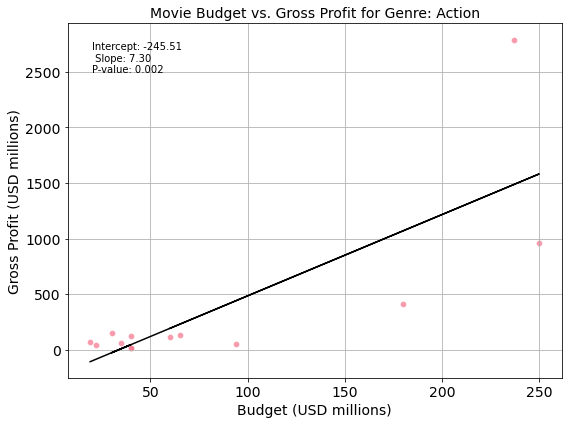

In [116]:
genre_df_crew_awarded = genre_df[(genre_df['crew_awards']>1)]
expected_awards = display_genre_ols(genre_df_crew_awarded, 'Action', palette[0], path_dir_results);
plt.gcf().savefig(os.path.join(path_dir_results, 'Action_Crew_Awarded_Action_plot.png'));

#### Conclusions for considering critically acclaimed cast/crew.

As we can see here, having critically-acclaimed crew (slope 7.3) is better for projected return than having a critically acclaimed cast (slope 3.4).

### 4.2.4. Summary of Recommendations for Action Genre.

We present the summary for `Action` genre in form of a  table.


|**Key Feature**       | **Recommended Value**    |
|----------------------|--------------------------|
| Budget               | $50-100 million          |
| Content Rating       | PG-13                    |
| Release Time         | Early Summer, Holiday Season |
| Duration             | 2-3 hours                |
| Subgenres            | Adventure, Sci-Fi.       |
| Expected Return Coefficient | 3.6              |
| Acclaimed Cast       | No                       |
| Acclaimed Crew       | Yes                      |

### 4.3.1. Generating analysis plots for all genres.

In the block of code below we'll loop through all genres and generate analysis plots for each.
We'll store the recommended parameters such as release time, returns, etc.. in a dataframe.
After the block we'll give a quick breakdown for each genre and present aggregated recommendations table.

In [117]:
# recommendation table
recommendations_genre = [];
grouped_df = movie_df[movie_df['genre1'].isin(top10_genres)]
grouped_content_df = content_rating_clean_df[content_rating_clean_df['genre1'].isin(top10_genres)]
palette = sns.color_palette("husl", n_colors=len(top10_genres))

for genre, color in zip(top10_genres, palette):
    g_df = grouped_df[grouped_df['genre1'] == genre]
    contentR_df = grouped_content_df[grouped_content_df['genre1'] == genre]
    #display_success_genre(genre_df, genre, color)
    
    plt_genre= plot_historic_trend(g_df);
    plt_genre.savefig(os.path.join(path_dir_results, f'{genre}_Historic_Budget_Profits_plot.jpg'));
    #budget historic, success, roi, disribution
    display_genre_budget_hist(g_df, genre, color, path_dir_results)
    display_genre_roi_hist(g_df, genre, color, path_dir_results)
    expected_ret = display_genre_ols(g_df, genre, color, path_dir_results)
    plt.gcf().savefig(os.path.join(path_dir_results, f'{genre}_expected_profits.png'));

    median_budget = g_df['budget_usd_mil'].median()
    
    #content rating (try/catch for low-data genre)
    preferred_content = display_genre_content_rating(contentR_df, genre, color, path_dir_results)    
    
    #release month
    preferred_month = display_genre_release_month(g_df, genre, color, path_dir_results)
    #duration
    preferred_duration = display_genre_duration(g_df, genre, color, path_dir_results)

    #subgenre
    preferred_subgenre = plot_genre_subgenre_bar(g_df, genre, color, path_dir_results)
    
    # 
    top_cast = display_top_cast_or_crew_with_awards(g_df, genre, 'cast_names', all_winners_set, color, path_dir_results)
    top_director = display_top_cast_or_crew_with_awards(g_df, genre, 'director', all_winners_set, color, path_dir_results)
    top_screenplay = display_top_cast_or_crew_with_awards(g_df, genre, 'screenplay', all_winners_set, color, path_dir_results)
    top_producer = display_top_cast_or_crew_with_awards(g_df, genre, 'producer', all_winners_set, color, path_dir_results)
    
    #OLD with/without awards
    expected_cast_awards = 'N/A'
    expected_crew_awards = 'N/A'
    
    try:
        genre_df_cast_awarded = g_df[(g_df['cast_awarded']>1)]
        if genre_df_crew_awarded.shape[0] > 1:
            expected_cast_awards = display_genre_ols(genre_df_cast_awarded, genre, color, path_dir_results)
            plt.gcf().savefig(os.path.join(path_dir_results, f'{genre}_Cast_Awarded_Action_plot.png'));
    except ValueError as e:
        print('Error')
    try:    
        genre_df_crew_awarded = g_df[(g_df['crew_awards']>1)]
        if genre_df_crew_awarded.shape[0] > 1:
            expected_crew_awards = display_genre_ols(genre_df_crew_awarded, genre, color, path_dir_results)
            plt.gcf().savefig(os.path.join(path_dir_results, f'{genre}_Crew_Awarded_Action_plot.png'));
    except ValueError as e:
        print('Error')
        
    
    # add values 
    genre_data = {
        'Genre': genre,
        'Median Budget': median_budget,       
        'Recommended Subgenres': preferred_subgenre,
        'Recommended Content Rating': preferred_content,
        'Recommended Months': preferred_month,
        'Recommended Duration': preferred_duration,
        'Recommended Cast': top_cast,
        'Recommended Directors': top_director,
        'Recommended Writers': top_screenplay,
        'Recommended Producers': top_producer,
        'Expected Return': expected_ret,
        'Expected Return with Cast Awards': expected_cast_awards,
        'Expected Return with Crew Awards': expected_crew_awards,        
    }
    plt.close('all')
    # Append the dictionary to the list
    recommendations_genre.append(genre_data)
genre_recommend_df = pd.DataFrame(recommendations_genre)


ValueError: min() arg is an empty sequence Thriller
ValueError: min() arg is an empty sequence Family


In [118]:
genre_recommend_df

,Genre,Median Budget,Recommended Subgenres,Recommended Content Rating,Recommended Months,Recommended Duration,Recommended Cast,Recommended Directors,Recommended Writers,Recommended Producers,Expected Return,Expected Return with Cast Awards,Expected Return with Crew Awards
0,Action,50.00,"Fantasy, Adventure, Sci-Fi, Animation, Horror",PG-13,"December, June, May","161-180, 141-160, 121-140","Michelle Rodriguez, Robert Downey Jr., Dwayn...","*Christopher Nolan, *James Cameron, James Wan,...",", Derek Connolly, Stephen McFeely, Jack Kirb...","Kevin Feige, Charles Roven, Michael Fottrell, ...",3.625257,3.41179,7.30263
1,Adventure,77.00,"Action, Sci-Fi, Crime, Family, Thriller",PG-13,"May, November, June",">200, 161-180, 141-160","Orlando Bloom, Alan Rickman, Rupert Grint, ...","*Peter Jackson, *Gore Verbinski, Andrew Adamso...","Fran Walsh, Philippa Boyens, *Peter Jackson,...","David Heyman, Jerry Bruckheimer, Peter Jackso...",3.072408,3.31742,2.77245
2,Drama,18.00,"Animation, Western, Action, Sport, Adventure",G,"December, February, June","141-160, 161-180, <80","*Leonardo DiCaprio, Eloise Mumford, Jamie Do...","*Christopher Nolan, Ladj Ly, *Tom Hooper, Ridl...",", Jonathan Nolan, *Christopher Nolan, Giordan...","Dana Brunetti, Michael De Luca, Charles Roven...",2.340630,2.38628,2.22759
3,Comedy,25.00,"Animation, Action, Fantasy, Family, Sci-Fi",G,"December, May, July","121-140, 101-120, 80-100","Justin Long, Jane Lynch, Christina Applegat...","Todd Phillips, Jay Roach, Mike Mitchell, Nancy...",", John Hamburg, Jim Herzfeld, Adam Herz, Joh...",", Jay Roach, Jane Rosenthal, Robert De Niro,...",2.311774,2.48117,0.329482
4,Animation,77.00,"Comedy, Adventure, Animation, Family, Sci-Fi",PG,"May, June, November","101-120, 80-100, <80","Denis Leary, John Ratzenberger, Kristen Wii...","Carlos Saldanha, Chris Renaud, Pierre Coffin,...",", *Andrew Stanton, Michael Berg, Cinco Paul, ...","Christopher Meledandri, Lori Forte, Janet Hea...",3.305847,3.20975,1.23567
5,Horror,12.55,"Drama, Romance, Mystery, Thriller, Crime",R,"November, October, September","121-140, 101-120, 80-100","Tobin Bell, Katie Featherston, Patrick Wilson,...","Andy Muschietti, James Wan, Jordan Peele, Darr...",", Stephen King, Cary Joji Fukunaga, Chase Pa...","Jason Blum, Oren Peli, Peter Safran, Oren K...",2.077034,0.340418,N/A
6,Fantasy,65.00,"Animation, Adventure, Fantasy, Drama, Action",PG-13,"May, June, July","121-140, 80-100, 161-180","J.K. Simmons, James Franco, Kirsten Dunst, ...","Sam Raimi, Raman Hui, Chris Miller, Robert St...","Linda Woolverton, David Koepp, Jon Zack, Pet...","Bonnie Arnold, Ian Bryce, Laura Ziskin, Stan...",2.783427,N/A,-0.328356
7,Sci-Fi,70.00,"Fantasy, Adventure, Mystery, Drama, Action",R,"June, April, May","161-180, 141-160, 121-140","Stanley Tucci, Mark Ruffalo, Chris Hemswort...","Michael Bay, Joss Whedon, George Lucas, Franci...",", Ehren Kruger, Joss Whedon, George Lucas, Pe...","Kevin Feige, Ian Bryce, Lorenzo di Bonaventu...",4.109872,5.6066,N/A
8,Thriller,27.22,"Fantasy, Action, History, Crime, Adventure",None,"August, December, May","141-160, 121-140, 101-120","*Tom Hanks, Brad Pitt, Paul Bettany, Alfred...","*Ron Howard, *Steven Soderbergh, Rupert Wyatt,...",", Akiva Goldsman, Amanda Silver, Rick Jaffa, ...","Brian Grazer, John Calley, Kathleen McGill, ...",2.272440,N/A,3.43266
9,Family,55.00,"Drama, Fantasy, Adventure, Family, Comedy",None,"March, May, June","121-140, 101-120, 80-100","Andy Richter, Chris Rock, Cedric the Entert...","Eric Darnell, Tom McGrath, *Bill Condon, Pie...",", Evan Spiliotopoulos, Gabrielle-Suzanne Bar...",", Janet Healy, Christopher Meledandri, Derek...",4.613776,4.48114,3.58113


#### Installing tabulate module.
The module [tabulate](https://pypi.org/project/tabulate/) is used to convert dataframe to markdown. 

In [119]:
!pip install tabulate

markdown_table = genre_recommend_df.to_markdown()
print(markdown_table)

|    | Genre     |   Median Budget | Recommended Subgenres                         | Recommended Content Rating   | Recommended Months           | Recommended Duration      | Recommended Cast                                                                                                                                                           | Recommended Directors                                                                                                                                            | Recommended Writers                                                                                                                                                                                   | Recommended Producers                                                                                                                                               |   Expected Return | Expected Return with Cast Awards   | Expected Return with Crew Awards   |
|---:|:----------|-----------

# 5. Conclusions.

We have performed EDA on multiple dataframes, and explored how movie factors like genre, release time, duration, cast or crew can influence the budget and the gross in box office. 
We already presented recommendations for `Action` genre above, we'll do similar brief presentation for the remaining genres below.

### Recomendations for `Adventure`:

#### Historic trends: profits are declining.
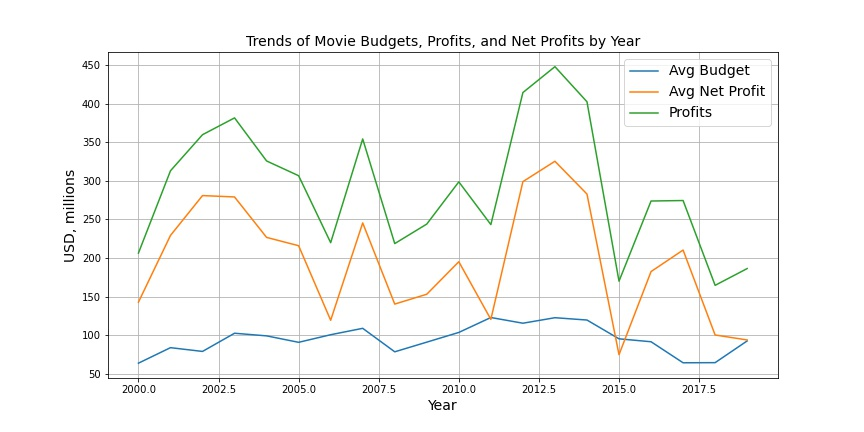

#### Budget and ROI: 
Most expensive entry budget, 1/3 of movies won't make 50%  of the invested budget.
Expected return coefficient is 3.07.

<img src='results/Adventure_budget.png'> 
<img src='results/Adventure_roi.png'> 
<img src='results/Adventure_expected_profits.png'> 

#### Release month and runtime: 

Best time to release is Holiday Season, early Summer.
Recommended duration is long movies.

<img src='results/Adventure_release_month.png'> 
<img src='results/Adventure_runtime.png'> 

#### Subgenres: 
Best performing subgenres are Action, Sci-Fi.
<img src='results/Adventure_subgenre.png'> 

#### Content Rating: 
Best-performing content rating is PG-13.
<img src='results/Adventure_content_rating.png'> 
#### Cast/Crew with awards:

Having critically acclaimed crew slightly outperforms the average (slope 3.3 vs slope 3.07).
Movies with critically acclaimed cast tend to underperform compared tothe average (slope 2.77 vs slope 3.07)
<img src='results/Adventure_Crew_Awarded_Action_plot.png'> 
<img src='results/Adventure_Cast_Awarded_Action_plot.png'> 


###  Recomendations for `Animation`:

#### Historic trends: profits are declining.

<img src='results/Animation_Historic_Budget_Profits_plot.jpg'>

#### Budget and ROI: 
As expensive as Adventure, 25% of movies won't make 50%  of the invested budget, so higher budget, lesser profits but lesser risks to have a failed movie.
Expected return coefficient is 3.3.

<img src='results/Animation_budget.png'> 
<img src='results/Animation_roi.png'> 
<img src='results/Animation_expected_profits.png'> 

#### Release month and runtime: 

Best time to release is early Summer and Holiday Season.
Recommended duration is medium-length movies, up to 2 hours.

<img src='results/Animation_release_month.png'> 
<img src='results/Animation_runtime.png'> 

#### Subgenres: 
Best performing subgenres are Comedy, Adventure.
<img src='results/Animation_subgenre.png'> 

#### Content Rating: 
Best-performing content rating is PG.
<img src='results/Animation_content_rating.png'> 
#### Cast/Crew with awards:
Not enough data to estimate performance with awarded cast.
Movies with critically acclaimed cast tend to perform equally compared to the average (slope 3.2 vs slope 3.3)
<img src='results/Animation_Cast_Awarded_Action_plot.png'> 

### Recomendations for `Comedy`:
#### Historic trends: profits are declining.

<img src='results/Comedy_Historic_Budget_Profits_plot.jpg'>

#### Budget and ROI: 
Low entry budget and low risk of failure.
Expected return coefficient is 2.31.

<img src='results/Comedy_budget.png'> 
<img src='results/Comedy_roi.png'> 
<img src='results/Comedy_expected_profits.png'> 

#### Release month and runtime: 

Best time to release is Holiday Season and early Summer.
Recommended duration is medium-length movies, up to 2 hours.

<img src='results/Comedy_release_month.png'> 
<img src='results/Comedy_runtime.png'> 

#### Subgenres: 
Best performing subgenres are Action.
<img src='results/Comedy_subgenre.png'> 

#### Content Rating: 
Best-performing content rating is G.
<img src='results/Comedy_content_rating.png'> 
#### Cast/Crew with awards:
Movies with critically acclaimed cast performed slightly better (slope 2.48 vs slope 2.3)
<img src='results/Comedy_Crew_Awarded_Action_plot.png'> 

Movies with awarded crew performed poor comparing to the baseline(0.48 vs 2.31)
<img src='results/Comedy_Crew_Awarded_Action_plot.png'>

###  Recomendations for `Drama`:
#### Historic trends: profits are rising!

<img src='results/Drama_Historic_Budget_Profits_plot.jpg'>

#### Budget and ROI: 
This is the most-represented genre in our dataset.
One of the lowest entry budgets (20-40 millions) but quite predictable returns (ROI distribution narrow).
Expected return coefficient is 2.34.

<img src='results/Drama_budget.png'> 
<img src='results/Drama_roi.png'> 
<img src='results/Drama_expected_profits.png'> 

#### Release month and runtime: 

Best time to release is December and Summer (June, July).
Recommended duration is longer movies of 2.5 hours.

<img src='results/Drama_release_month.png'> 
<img src='results/Drama_runtime.png'> 

#### Subgenres: 
Best performing subgenres are Action, Animation.
<img src='results/Drama_subgenre.png'> 

#### Content Rating: 
Best-performing content rating is G.
<img src='results/Drama_content_rating.png'> 
#### Cast/Crew with awards:
Movies with critically acclaimed cast and crew performed comparably to baseline.
<img src='results/Drama_Crew_Awarded_Action_plot.png'> 
<img src='results/Drama_Cast_Awarded_Action_plot.png'>

###  Recomendations for `Horror`:

#### Historic trends: profits are oscillating. 
Overall profits are consistently higher than the budget.
<img src='results/Horror_Historic_Budget_Profits_plot.jpg'>

#### Budget and ROI: 
The lowest entry budgets (10-30 millions) and quite predictable returns (ROI distribution narrow), and most of the movies ended up being profitable.
Expected return coefficient is 2.08.

<img src='results/Horror_budget.png'> 
<img src='results/Horror_roi.png'> 
<img src='results/Horror_expected_profits.png'> 

#### Release month and runtime: 

Best time to release is October.
Recommended duration is longer movies of 2.5 hours.

<img src='results/Horror_release_month.png'> 
<img src='results/Horror_runtime.png'> 

#### Subgenres: 
Best performing subgenres are Drama.
<img src='results/Horror_subgenre.png'> 

#### Content Rating: 
Best-performing content rating is R!
<img src='results/Horror_content_rating.png'> 
#### Cast/Crew with awards:
Movies with critically acclaimed cast performed poorly compared to baseline (0.34 vs 2).
<img src='results/Horror_Cast_Awarded_Action_plot.png'> 

###  Recomendations for `Fantasy`:

#### Historic trends: profits are oscillating.
Net profits are consistently low unless a heavy-hitter movie comes out.
<img src='results/Fantasy_Historic_Budget_Profits_plot.jpg'>

#### Budget and ROI: 
One of the widest-spread budgets (25-125 millions) and most of the movies don't get a return over 250%.
Expected return coefficient is 2.8

<img src='results/Fantasy_budget.png'> 
<img src='results/Fantasy_roi.png'> 
<img src='results/Fantasy_expected_profits.png'> 

#### Release month and runtime: 

Best time to release is May.
Recommended durations are either shorter movies (80-90 minutes)or longer movies of 2.5 hours.

<img src='results/Fantasy_release_month.png'> 
<img src='results/Fantasy_runtime.png'> 

#### Subgenres: 
Best performing subgenres are Animation.
<img src='results/Fantasy_subgenre.png'> 

#### Content Rating: 
Best-performing content rating is PG-13.
<img src='results/Fantasy_content_rating.png'> 
#### Cast/Crew with awards:
Movies with critically acclaimed crew performed comparably to baseline.
<img src='results/Fantasy_Crew_Awarded_Action_plot.png'> 


###  Recomendations for `Family`:

#### Historic trends: profits are rising!

<img src='results/Family_Historic_Budget_Profits_plot.jpg'>

#### Budget and ROI: 
Budgets are spread out (25-100 millions), but 70% of the movies end up having good profits.
Expected return coefficient is 4.6.

<img src='results/Family_budget.png'> 
<img src='results/Family_roi.png'> 
<img src='results/Family_expected_profits.png'> 

#### Release month and runtime: 

Best time to release is March.
Recommended duration is longer movies of 2.5 hours.

<img src='results/Family_release_month.png'> 
<img src='results/Family_runtime.png'> 

#### Subgenres: 
Best performing subgenres are Drama, Fantasy.
<img src='results/Family_subgenre.png'> 

#### Content Rating: 
Not enough data for content-rating performance.
#### Cast/Crew with awards:
Movies with critically acclaimed cast performed worse than baseline (3.66 vs 4.6).
<img src='results/Family_Cast_Awarded_Action_plot.png'> 


###  Recomendations for `Sci-Fi`:

#### Historic trends: profits are falling.

<img src='results/Sci-Fi_Historic_Budget_Profits_plot.jpg'>

#### Budget and ROI: 
Most spread-out budgets are spread out (25-150 millions), most of the movies end up having good profits.
Expected return coefficient is 4.11.

<img src='results/Sci-Fi_budget.png'> 
<img src='results/Sci-Fi_roi.png'> 
<img src='results/Sci-Fi_expected_profits.png'> 

#### Release month and runtime: 

Best time to release is Late Spring-Summer.
Recommended duration is longer movies of 2.5-3 hours.

<img src='results/Sci-Fi_release_month.png'> 
<img src='results/Sci-Fi_runtime.png'> 

#### Subgenres: 
Best performing subgenres are Adventure, Fantasy.
<img src='results/Sci-Fi_subgenre.png'> 

#### Content Rating: 
Not enough data for content-rating performance.
#### Cast/Crew with awards:
Movies with critically acclaimed cast performed much better than baseline (5.61 vs 4.11).
<img src='results/Sci-Fi_Cast_Awarded_Action_plot.png'> 

###  Recomendations for `Thriller`:

#### Historic trends: profits are declining.

<img src='results/Thriller_Historic_Budget_Profits_plot.jpg'>

#### Budget and ROI: 
Low-entry budget (25-50 millions), with 40 % of movies not having good returns.
Expected return coefficient is 2.6.

<img src='results/Thriller_budget.png'> 
<img src='results/Thriller_roi.png'> 
<img src='results/Thriller_expected_profits.png'> 

#### Release month and runtime: 

Best time to release is August, December
Recommended duration is longer movies of 2.5 hours.

<img src='results/Thriller_release_month.png'> 
<img src='results/Thriller_runtime.png'> 

#### Subgenres: 
Best performing subgenres are Action, Fantasy.
<img src='results/Thriller_subgenre.png'> 

#### Content Rating: 
Not enough data for content-rating performance.
#### Cast/Crew with awards:
Movies with critically acclaimed crew performed much better than baseline (3.43 vs 2.6).
<img src='results/Thriller_Crew_Awarded_Action_plot.png'> 

# 5.1. The extended recommendation table.

|    | Genre     |   Median Budget | Recommended Subgenres                           | Recommended Content Rating   | Recommended Months           | Recommended Duration      | Recommended Cast                                                                                                                                                           | Recommended Directors                                                                                                                                            | Recommended Writers                                                                                                                                                                                   | Recommended Producers                                                                                                                                               |   Expected Return | Expected Return with Cast Awards   | Expected Return with Crew Awards   |
|---:|:----------|----------------:|:------------------------------------------------|:-----------------------------|:-----------------------------|:--------------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------:|:-----------------------------------|:-----------------------------------|
|  0 | Action    |           50    | Adventure, War, Sci-Fi, Mystery, Horror         | PG-13                        | December, June, May          | 161-180, 141-160, 121-140 | Michelle Rodriguez, Robert Downey Jr.,  Dwayne Johnson, Vin Diesel,  Chris Hemsworth,  Zoe Saldana,  Mark Ruffalo, Tom Cruise,  Samuel L. Jackson,  Jordana Brewster       | *Christopher Nolan, *James Cameron, James Wan,  Joe Russo, Anthony Russo, *Brad Bird, Roland Emmerich, Zack Snyder, Rian Johnson, *Christopher McQuarrie         | ,  Derek Connolly,  Stephen McFeely, Jack Kirby, *James Cameron, *Christopher Nolan,  Stan Lee,  Chris McKenna,  Erik Sommers,  Colin Trevorrow                                                       | Kevin Feige, Charles Roven, Michael Fottrell,  Neal H. Moritz,  Emma Thomas,  Jon Landau, *James Cameron, Frank Marshall,  Bryan Burk,  Patrick Crowley             |           3.62526 | 3.4117907189027465                 | 7.302632565781717                  |
|  1 | Adventure |           77    | Thriller, Fantasy, Action, Family, Animation    | PG-13                        | May, November, June          | >200, 161-180, 141-160    | Orlando Bloom,  Alan Rickman,  Rupert Grint, Daniel Radcliffe,  Emma Watson,  Robbie Coltrane,  Ian McKellen,  Tom Felton, Johnny Depp,  Maggie Smith                      | *Peter Jackson, *Gore Verbinski, Andrew Adamson, David Yates, Chris Columbus, *Steven Spielberg,  Eric Guillon,  Pierre Coffin, Kyle Balda, Mike Newell          | Fran Walsh,  Philippa Boyens, *Peter Jackson, Steve Kloves, ,  Terry Rossio, Ted Elliott, Melissa Rosenberg,  Stephen McFeely, Andrew Adamson                                                         | David Heyman, Jerry Bruckheimer,  Peter Jackson, Barrie M. Osborne, Karen Rosenfelt,  Carolynne Cunningham,  Wyck Godfrey,  Fran Walsh, *Peter Jackson, Kevin Feige |           3.07241 | 3.317416449226497                  | 2.7724471438362843                 |
|  2 | Comedy    |           25    | Animation, Fantasy, Adventure, Family, Music    | G                            | December, May, July          | 121-140, 101-120, 80-100  | Justin Long,  Jane Lynch,  Christina Applegate,  Anna Faris,  Owen Wilson,  Julie Andrews, *Meryl Streep,  David Cross,  Colin Firth,  Zach Galifianakis                   | Todd Phillips, Jay Roach, Mike Mitchell, Nancy Meyers, Seth MacFarlane, Phyllida Lloyd, Dennis Dugan, Garry Marshall, Nicholas Stoller,  Peter Farrelly          | ,  John Hamburg, Jim Herzfeld, Adam Herz,  John Morris, Catherine Johnson,  Alec Sulkin,  Wellesley Wild, Seth MacFarlane, Jon Lucas                                                                  | ,  Jay Roach,  Jane Rosenthal, Robert De Niro, Judd Apatow,  Jack Giarraputo, Scott Rudin,  Jason Clark,  John Jacobs,  Daniel Goldberg                             |           2.31177 | 2.4811724953829564                 | 0.3294820481452031                 |
|  3 | Drama     |           18    | Adventure, Western, Sport, Action, Music        | G                            | December, February, June     | 141-160, 161-180, <80     | *Leonardo DiCaprio,  Eloise Mumford,  Jamie Dornan, Dakota Johnson,  Morgan Freeman,  Jennifer Ehle, *Christian Bale,  Aaron Eckhart,  Maggie Gyllenhaal,  Heath Ledger    | *Christopher Nolan, Ladj Ly, *Tom Hooper, Ridley Scott, M. Night Shyamalan, *Pete Docter, James Foley, *Steven Spielberg, Darren Aronofsky, *Clint Eastwood      | ,  Jonathan Nolan, *Christopher Nolan, Giordano Gederlini, Akiva Goldsman,  Josh Cooley,  Meg LeFauve, *Pete Docter,  E.L. James, Niall Leonard                                                       | Dana Brunetti, Michael De Luca, Charles Roven,  Emma Thomas,  Eric Fellner,  Christopher Nolan,  Lorne Orleans, , *Steven Spielberg, Jonas Rivera                   |           2.34063 | 2.386284386159842                  | 2.227592209211498                  |
|  4 | Animation |           77    | Family, Adventure, Drama, Comedy, Action        | PG                           | May, June, November          | 101-120, 80-100, <80      | Denis Leary,  John Ratzenberger,  Kristen Wiig,  Chris Wedge,  Queen Latifah,  Seann William Scott,  Josh Gad,  Will Arnett,  Steve Buscemi,  John Leguizamo               | Carlos Saldanha,  Chris Renaud, Pierre Coffin, *Andrew Stanton,  Jennifer Lee, Chris Buck, *Pete Docter, Steve Martino, *Lee Unkrich, Conrad Vernon              | , *Andrew Stanton, Michael Berg,  Cinco Paul, Ken Daurio, Jennifer Lee,  Peter Ackerman,  Jonathan Aibel, Michael Arndt,  Bob Peterson                                                                | Christopher Meledandri, Lori Forte,  Janet Healy, , Peter Del Vecho, John C. Donkin,  Darla K. Anderson, John Lasseter, Graham Walters,  John C. Donkin             |           3.30585 | 3.2097516763531573                 | 1.2356730408478946                 |
|  5 | Horror    |           12.55 | Horror, Mystery, Action, Drama, Sci-Fi          | R                            | November, October, September | 121-140, 101-120, 80-100  | Tobin Bell, Katie Featherston, Patrick Wilson,  Finn Wolfhard,  Jaeden Martell,  Sophia Lillis, Bill Skarsgård,  Bea Jugo C.,  Gonzalo Moreno,  Isabelle Stokes            | Andy Muschietti, James Wan, Jordan Peele, Darren Lynn Bousman,  Ariel Schulman, Henry Joost, David F. Sandberg, John R. Leonetti, David Gordon Green, Wes Craven | , Stephen King,  Cary Joji Fukunaga,  Chase Palmer,  Gary Dauberman,  Chad Hayes, Carey Hayes, Christopher B. Landon, Leigh Whannell, Gary Dauberman                                                  | Jason Blum,  Oren Peli,  Peter Safran,  Oren Koules, Mark Burg, Seth Grahame-Smith, Rob Cowan,  Gregg Hoffman,  Sean McKittrick,  James Wan                         |           2.07703 | 0.340417508794597                  | N/A                                |
|  6 | Sci-Fi    |           70    | Adventure, Action, Fantasy, Thriller, Animation | R                            | June, April, May             | 161-180, 141-160, 121-140 | Stanley Tucci,  Mark Ruffalo,  Chris Hemsworth,  Clark Gregg,  Cobie Smulders,  Jeremy Renner,  Scarlett Johansson,  Stellan Skarsgård,  Tom Hiddleston, Robert Downey Jr. | Michael Bay, Joss Whedon, George Lucas, Francis Lawrence, Gary Ross, *Alfonso Cuarón, Matt Reeves, Peyton Reed, Bryan Singer, Jonathan Liebesman                 | , Ehren Kruger, Joss Whedon, George Lucas,  Peter Craig, Danny Strong,  Gary Ross,  Suzanne Collins, Billy Ray,  Adam McKay                                                                           | Kevin Feige,  Ian Bryce,  Lorenzo di Bonaventura,  Tom DeSanto, Don Murphy,  Nina Jacobson, Jon Kilik, Rick McCallum,  Alfonso Cuarón, David Heyman                 |           4.10987 | N/A                                | N/A                                |
|  7 | Fantasy   |           65    | Adventure, Family, Animation, Action, Comedy    | PG-13                        | May, June, July              | 121-140, 80-100, 161-180  | J.K. Simmons,  James Franco,  Kirsten Dunst,  Rosemary Harris, Tobey Maguire,  Gerard Butler,  America Ferrera,  Christopher Mintz-Plasse,  Kristen Wiig,  T.J. Miller     | Sam Raimi,  Raman Hui, Chris Miller, Robert Stromberg, Peter Berg, *Hayao Miyazaki, Dean DeBlois, Tom Shadyac,  Dean DeBlois, Chris Sanders                      | Linda Woolverton, David Koepp,  Jon Zack,  Peter S. Seaman, Jeffrey Price,  Alvin Sargent,  Ivan Raimi, Sam Raimi, ,  Vince Gilligan                                                                  | Bonnie Arnold,  Ian Bryce,  Laura Ziskin, Stan Lee,  Denise Nolan Cascino, *Aron Warner,  Avi Arad,  Grant Curtis, Laura Ziskin,                                    |           2.78343 | N/A                                | -0.32835610797417003               |
|  8 | Family    |           55    | Fantasy, Adventure, Animation, Comedy, Drama    |                              | March, May, June             | 121-140, 101-120, 80-100  | Andy Richter,  Chris Rock,  Cedric the Entertainer,  David Schwimmer,  Jada Pinkett Smith,  Sacha Baron Cohen, Ben Stiller,  Josh Gad,  Alec Baldwin,  Bernie Mac          | Eric Darnell,  Tom McGrath, *Bill Condon,  Pierre Coffin, Kyle Balda, Tim Burton, Jon Favreau,  Simon J. Smith, Rich Moore,  Clay Kaytis                         | ,  Evan Spiliotopoulos,  Gabrielle-Suzanne Barbot de Villeneuve,  Jeanne-Marie Leprince de Beaumont,  Linda Woolverton, Stephen Chbosky, Linda Woolverton, Justin Marks,  Jennifer Lee, Phil Johnston | ,  Janet Healy, Christopher Meledandri,  Derek Frey,  Joe Roth,  Katterli Frauenfelder,  Richard D. Zanuck,  Tom C. Peitzman,  Suzanne Todd, Jennifer Todd          |           4.61378 | 4.481137076843299                  | 3.581128506652473                  |
|  9 | Thriller  |           27.22 | Adventure, Mystery, Fantasy, Action, Sci-Fi     |                              | August, December, May        | 141-160, 121-140, 101-120 | *Tom Hanks,  Brad Pitt,  Paul Bettany,  Alfred Molina,  Julia Roberts, *George Clooney,  Audrey Tautou,  Ian McKellen,  Jean Reno,  Jean-Pierre Marielle                   | *Ron Howard, *Steven Soderbergh, Rupert Wyatt, Olivier Megaton, Tim Burton, Brian A Miller, Joel Schumacher, J.J. Abrams, Sylvester Stallone, Robert Schwentke   | , Akiva Goldsman,  Amanda Silver, Rick Jaffa, Ted Griffin, David Koepp, George Nolfi,  Andre Fabrizio, Jeremy Passmore,  Akiva Goldsman                                                               | Brian Grazer,  John Calley,  Kathleen McGill,  Louisa Velis,  Ron Howard, Jerry Weintraub,  Amanda Silver,  Dylan Clark,  Peter Chernin, Rick Jaffa                 |           2.27244 | 3.190626208736071                  | 3.4326579447383745                 |